# Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). 

The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1. A single cell estimate of the population 16+ for each state.

2. Controls for Hispanic Origin by age and sex.

3. Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

In [146]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [147]:
df.shape

(32560, 15)

In [148]:
df= df.drop_duplicates()

In [149]:
df.shape

(32536, 15)

In [150]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [151]:
# We can see there no null values so we are good to proceed further!

In [152]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [153]:
# 6  features are of integer data types
# 9  features are of object data types

In [154]:
df.nunique().to_frame("Unique values")

,Unique values
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


In [155]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32536.0,38.585536,13.638193,17.0,28.0,37.0,48.00,90.0
Fnlwgt,32536.0,189784.298992,105556.258211,12285.0,117831.5,178356.0,236993.25,1484705.0
Education_num,32536.0,10.081725,2.571622,1.0,9.0,10.0,12.00,16.0
Capital_gain,32536.0,1078.410069,7388.068465,0.0,0.0,0.0,0.00,99999.0
Capital_loss,32536.0,87.370912,403.107737,0.0,0.0,0.0,0.00,4356.0
Hours_per_week,32536.0,40.440343,12.347079,1.0,40.0,40.0,45.00,99.0


In [156]:
# list. of object data types:

object_datatypes=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='O':
        object_datatypes.append(x)
object_datatypes

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

In [157]:
# list of integer data types:

integer_datatypes=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='int64':
      integer_datatypes.append(x)
integer_datatypes 

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

In [158]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [159]:
columns= ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income']

In [160]:
# EDA and Visualization

In [161]:
# countplot for object types features

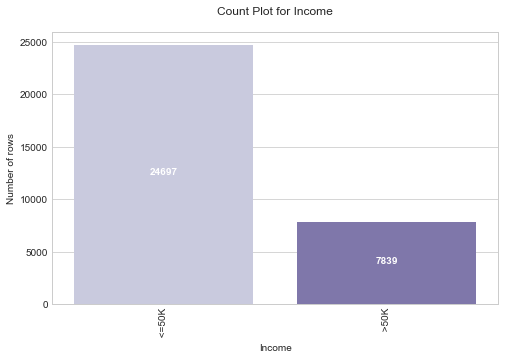

In [162]:
# Income

plt.figure(figsize=(8,5))
col_name = 'Income'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="Purples")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

([<matplotlib.patches.Wedge at 0x252ad282cd0>,
 [Text(-0.7996546353035874, 0.7553492332937705, ' <=50K'),
  Text(0.7996546353035869, -0.7553492332937709, ' >50K')],
 [Text(-0.43617525562013854, 0.4120086727056929, '75.91%'),
  Text(0.43617525562013826, -0.4120086727056932, '24.09%')])

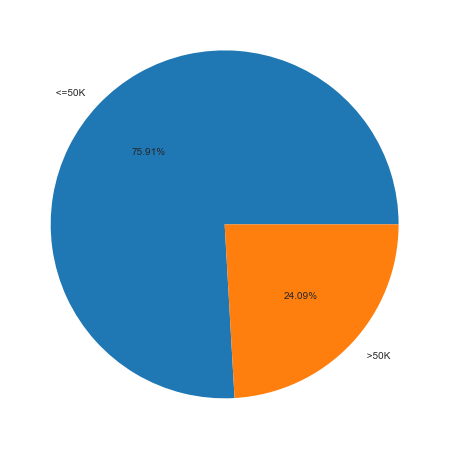

In [163]:
plt.figure(figsize=(12,8))
plt.pie(df['Income'].value_counts().values,labels=df['Income'].value_counts().index,autopct='%1.2f%%')

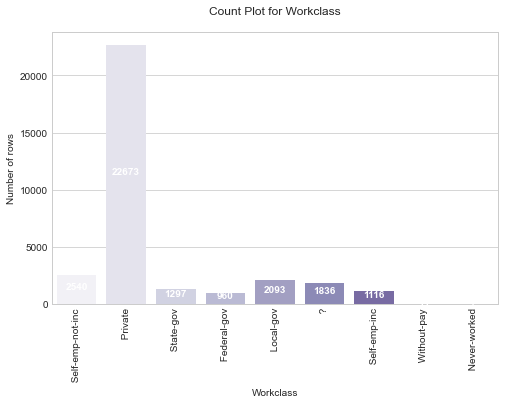

In [164]:
# Workclass

plt.figure(figsize=(8,5))
col_name = 'Workclass'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="Purples")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

([<matplotlib.patches.Wedge at 0x252aafe5670>,
 [Text(-0.6377506233318267, 0.8962556233797736, ' Private'),
  Text(-0.0973759414441268, -1.0956814893151523, ' Self-emp-not-inc'),
  Text(0.38617430348620246, -1.0299851490807752, ' Local-gov'),
  Text(0.7401598687168772, -0.8137342125909511, ' ?'),
  Text(0.9489783422456677, -0.5562734093489142, ' State-gov'),
  Text(1.051775035849433, -0.3221323857731845, ' Self-emp-inc'),
  Text(1.0948556587242653, -0.10625952455876875, ' Federal-gov'),
  Text(1.099995980105214, -0.002973844711840557, ' Without-pay'),
  Text(1.0999997488175566, -0.000743371584401754, ' Never-worked')],
 [Text(-0.3478639763628145, 0.48886670366169466, '69.69%'),
  Text(-0.05311414987861462, -0.5976444487173558, '7.81%'),
  Text(0.21064052917429224, -0.5618100813167863, '6.43%'),
  Text(0.40372356475466026, -0.44385502504960966, '5.64%'),
  Text(0.5176245503158187, -0.30342185964486224, '3.99%'),
  Text(0.5736954740996908, -0.17570857405810061, '3.43%'),
  Text(0.5971939

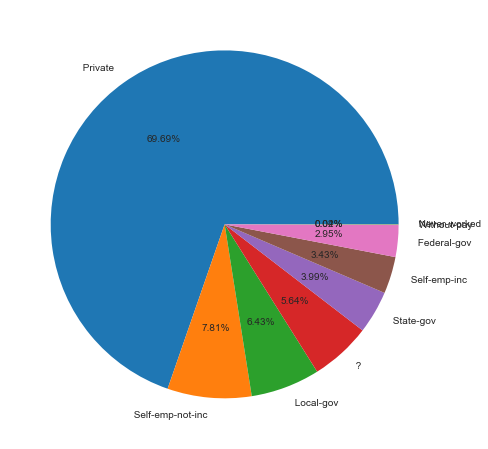

In [165]:
plt.figure(figsize=(12,8))
plt.pie(df['Workclass'].value_counts().values,labels=df['Workclass'].value_counts().index,autopct='%1.2f%%')

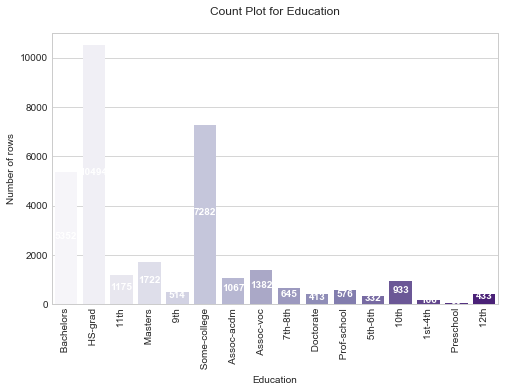

In [166]:
# Education

plt.figure(figsize=(8,5))
col_name = 'Education'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="Purples")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

([<matplotlib.patches.Wedge at 0x252ab049250>,
 [Text(0.5819941577085065, 0.9334253052029211, ' HS-grad'),
  Text(-1.0079918223844353, 0.44040037012485056, ' Some-college'),
  Text(-0.7600460794942597, -0.7951917737536057, ' Bachelors'),
  Text(-0.0876391322935259, -1.0965032523849794, ' Masters'),
  Text(0.24000729316784916, -1.0734973214807022, ' Assoc-voc'),
  Text(0.4950882432990627, -0.982286939415896, ' 11th'),
  Text(0.6945226504213442, -0.8530171675011655, ' Assoc-acdm'),
  Text(0.8453206212873396, -0.7038700499569407, ' 10th'),
  Text(0.9423596757750706, -0.5674136423043632, ' 7th-8th'),
  Text(1.0025593302455282, -0.4526309637415873, ' Prof-school'),
  Text(1.0445621726382779, -0.34480410016877805, ' 9th'),
  Text(1.0716832199748585, -0.24798200746086238, ' 12th'),
  Text(1.0883441413656354, -0.15970920435309288, ' Doctorate'),
  Text(1.0970082576717002, -0.08107331620268782, ' 5th-6th'),
  Text(1.0996371940086322, -0.028249629251052715, ' 1st-4th'),
  Text(1.0999871802870593

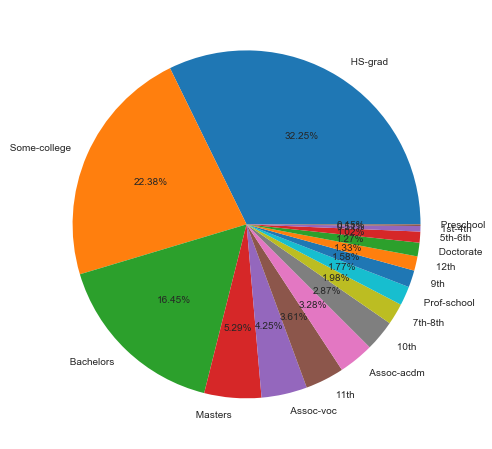

In [167]:
plt.figure(figsize=(12,8))
plt.pie(df['Education'].value_counts().values,labels=df['Education'].value_counts().index,autopct='%1.2f%%')

Text(0, 0.5, 'No of peoples')

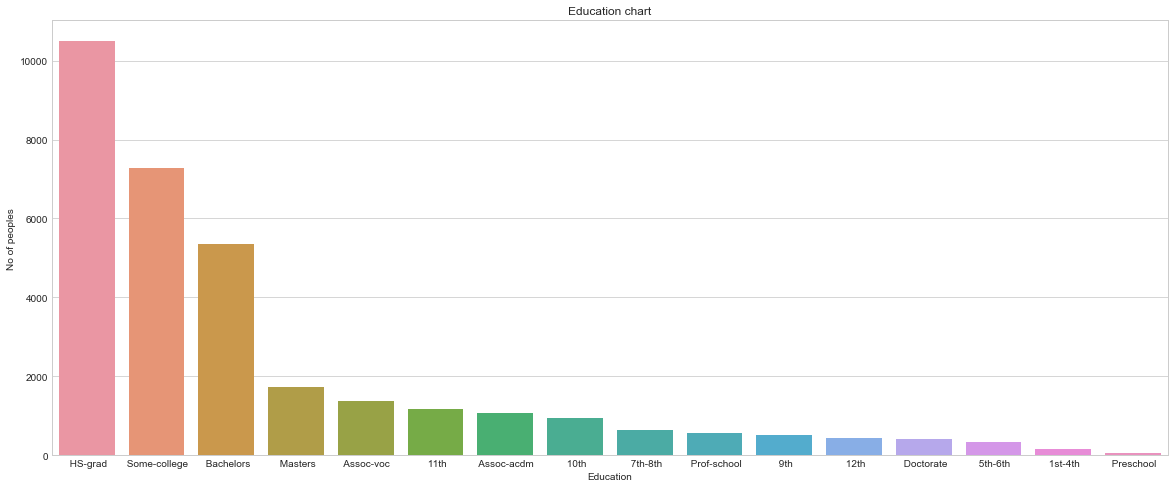

In [168]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,8))
sns.countplot(df['Education'],order=df['Education'].value_counts().index)
plt.title('Education chart')
plt.xlabel('Education')
plt.ylabel('No of peoples')

Text(0, 0.5, 'Count of peoples')

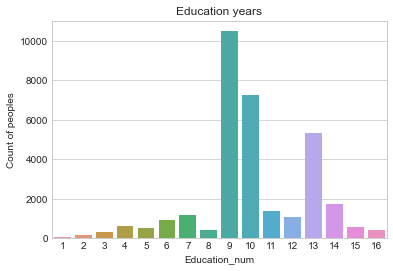

In [169]:
sns.countplot(df['Education_num'])
plt.title('Education years')
plt.ylabel('Count of peoples')

In [170]:
# Maximum peoples have taken 9years education and then 10 years

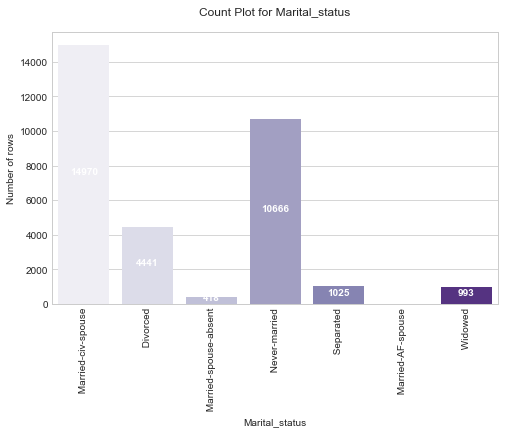

In [171]:
# Marital_status

plt.figure(figsize=(8,5))
col_name = 'Marital_status'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="Purples")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

([<matplotlib.patches.Wedge at 0x252ab3a6b50>,
 [Text(0.1375040977234144, 1.0913718995417052, ' Married-civ-spouse'),
  Text(-0.7826092866827289, -0.7729959278016608, ' Never-married'),
  Text(0.6805945199858154, -0.86417075822159, ' Divorced'),
  Text(1.0231961225254476, -0.4038188886727436, ' Separated'),
  Text(1.0820216347776737, -0.19806358038026736, ' Widowed'),
  Text(1.0988961807495703, -0.04926645850888516, ' Married-spouse-absent'),
  Text(1.0999972873052581, -0.002442932883595475, ' Married-AF-spouse')],
 [Text(0.0750022351218624, 0.5952937633863846, '46.01%'),
  Text(-0.4268777927360339, -0.42163414243726954, '32.78%'),
  Text(0.3712333745377175, -0.47136586812086717, '13.65%'),
  Text(0.5581069759229713, -0.22026484836695104, '3.15%'),
  Text(0.5901936189696402, -0.10803468020741856, '3.05%'),
  Text(0.5993979167724929, -0.026872613732119178, '1.28%'),
  Text(0.5999985203483226, -0.0013325088455975317, '0.07%')])

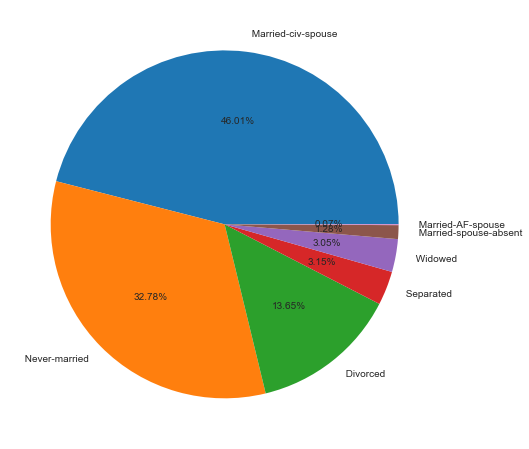

In [172]:
plt.figure(figsize=(12,8))
plt.pie(df['Marital_status'].value_counts().values,labels=df['Marital_status'].value_counts().index,autopct='%1.2f%%')

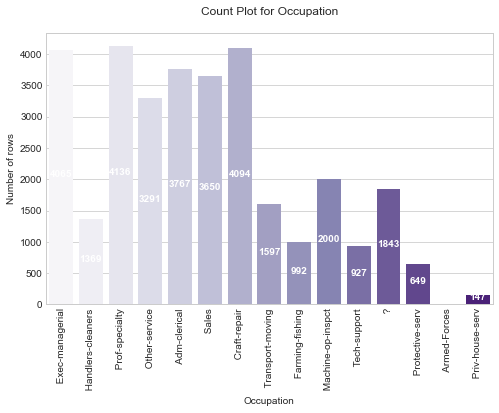

In [173]:
# Occupation

plt.figure(figsize=(8,5))
col_name = 'Occupation'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="Purples")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

([<matplotlib.patches.Wedge at 0x252aa4df490>,
 [Text(1.0134403684285853, 0.4277132446386638, ' Prof-specialty'),
  Text(0.4047078662472011, 1.022844828406361, ' Craft-repair'),
  Text(-0.4395242623363405, 1.0083741482295625, ' Exec-managerial'),
  Text(-1.0116558049899524, 0.4319172747530843, ' Adm-clerical'),
  Text(-1.0466729877617347, -0.338342513867122, ' Sales'),
  Text(-0.6101112344736714, -0.9152946419426987, ' Other-service'),
  Text(-0.08467420525354018, -1.0967361938792217, ' Machine-op-inspct'),
  Text(0.31877955324736723, -1.0527960849240507, ' ?'),
  Text(0.6446547275771919, -0.8913025761279817, ' Transport-moving'),
  Text(0.8701824958324825, -0.6728910936747132, ' Handlers-cleaners'),
  Text(0.9997431191398328, -0.4588177151468305, ' Farming-fishing'),
  Text(1.0671600844748528, -0.266775849925786, ' Tech-support'),
  Text(1.0952677375738447, -0.10192439859951094, ' Protective-serv'),
  Text(1.0998603984395787, -0.01752438142506277, ' Priv-house-serv'),
  Text(1.0999995

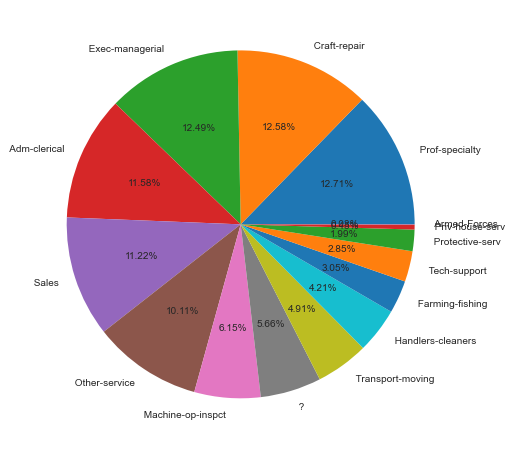

In [174]:
plt.figure(figsize=(12,8))
plt.pie(df['Occupation'].value_counts().values,labels=df['Occupation'].value_counts().index,autopct='%1.2f%%')

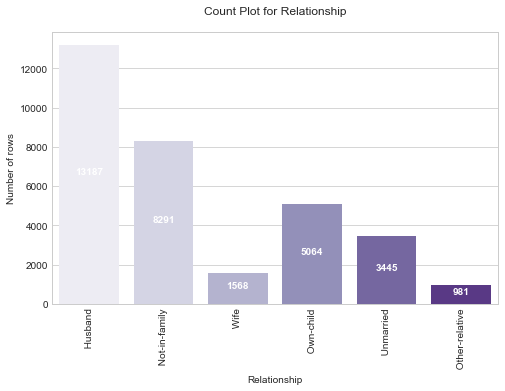

In [175]:
# Relationship

plt.figure(figsize=(8,5))
col_name = 'Relationship'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="Purples")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

([<matplotlib.patches.Wedge at 0x252ae897af0>,
 [Text(0.3224371993915311, 1.0516816307459906, ' Husband'),
  Text(-1.0768391248149134, -0.2245384137911638, ' Not-in-family'),
  Text(-0.08319177142140793, -1.0968496383587718, ' Own-child'),
  Text(0.7465013112241684, -0.8079206596817521, ' Unmarried'),
  Text(1.0367187260922932, -0.3677149479822285, ' Wife'),
  Text(1.09506884385111, -0.10403954645515089, ' Other-relative')],
 [Text(0.1758748360317442, 0.5736445258614493, '40.53%'),
  Text(-0.587366795353589, -0.12247549843154387, '25.48%'),
  Text(-0.045377329866222504, -0.5982816209229663, '15.56%'),
  Text(0.4071825333950009, -0.44068399619004656, '10.59%'),
  Text(0.5654829415048871, -0.20057178980848825, '4.82%'),
  Text(0.5973102784642418, -0.05674884352099138, '3.02%')])

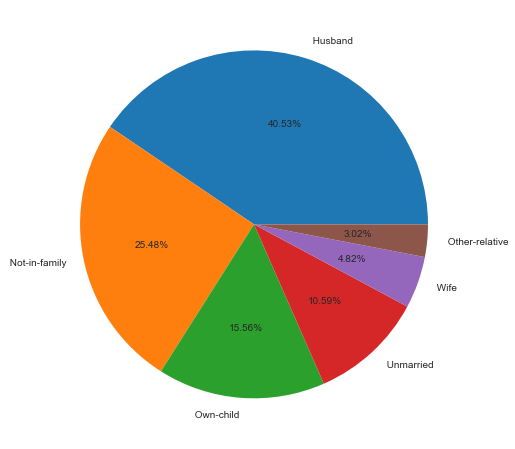

In [176]:
plt.figure(figsize=(12,8))
plt.pie(df['Relationship'].value_counts().values,labels=df['Relationship'].value_counts().index,autopct='%1.2f%%')

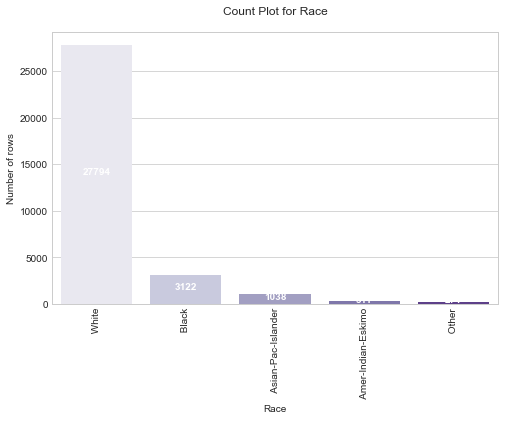

In [177]:
# Race

plt.figure(figsize=(8,5))
col_name = 'Race'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="Purples")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

([<matplotlib.patches.Wedge at 0x252ab824190>,
 [Text(-0.9866931093166929, 0.48624757894200055, ' White'),
  Text(0.8988959321267543, -0.634023740254238, ' Black'),
  Text(1.0752296881278052, -0.2321230659985837, ' Asian-Pac-Islander'),
  Text(1.0962710611498185, -0.0904972954593159, ' Amer-Indian-Eskimo'),
  Text(1.099623431824996, -0.028780343664010024, ' Other')],
 [Text(-0.5381962414454687, 0.2652259521501821, '85.43%'),
  Text(0.4903068720691387, -0.3458311310477662, '9.60%'),
  Text(0.5864889207969846, -0.1266125814537729, '3.19%'),
  Text(0.5979660333544464, -0.04936216115962685, '0.96%'),
  Text(0.5997945991772705, -0.01569836927127819, '0.83%')])

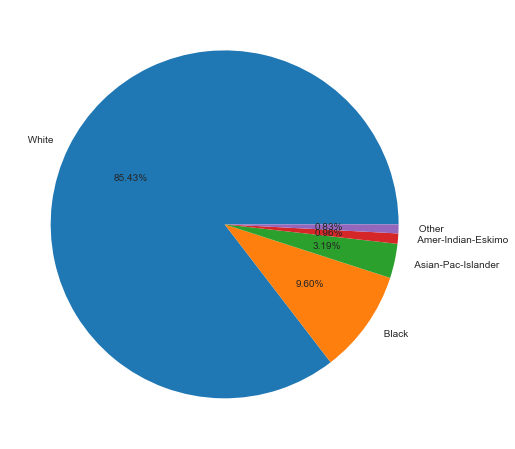

In [178]:
plt.figure(figsize=(12,8))
plt.pie(df['Race'].value_counts().values,labels=df['Race'].value_counts().index,autopct='%1.2f%%')

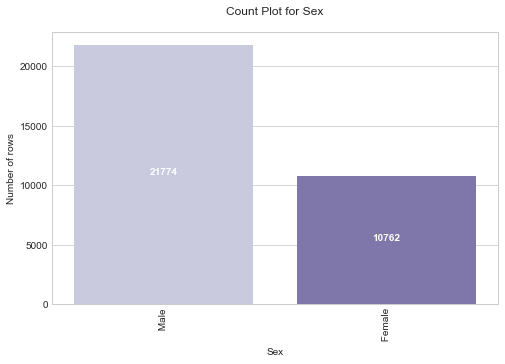

In [179]:
# Sex

plt.figure(figsize=(8,5))
col_name = 'Sex'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="Purples")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

([<matplotlib.patches.Wedge at 0x252ab771820>,
 [Text(-0.5576474643925867, 0.9481715590843879, ' Male'),
  Text(0.5576475531668128, -0.9481715068736599, ' Female')],
 [Text(-0.3041713442141382, 0.5171844867733024, '66.92%'),
  Text(0.30417139263644327, -0.5171844582947235, '33.08%')])

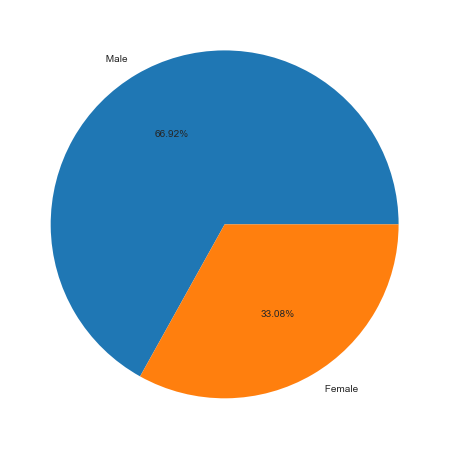

In [180]:
plt.figure(figsize=(12,8))
plt.pie(df['Sex'].value_counts().values,labels=df['Sex'].value_counts().index,autopct='%1.2f%%')

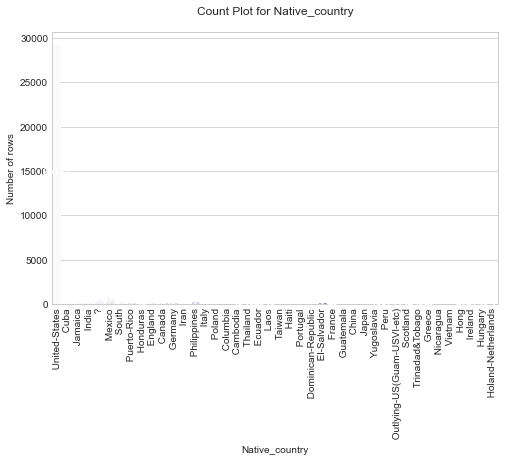

In [181]:
# Native_country

plt.figure(figsize=(8,5))
col_name = 'Native_country'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="Purples")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

([<matplotlib.patches.Wedge at 0x252af3b53a0>,
 [Text(-1.0417994396488452, 0.3530636310176289, ' United-States'),
  Text(0.9129314692392522, -0.6136416971430971, ' Mexico'),
  Text(0.9787729219867916, -0.501999568909614, ' ?'),
  Text(1.0137705399584502, -0.42693007895011614, ' Philippines'),
  Text(1.027047614291703, -0.3939202939399307, ' Germany'),
  Text(1.036541194134408, -0.36821509048708956, ' Canada'),
  Text(1.0446288082079966, -0.3446021663628087, ' Puerto-Rico'),
  Text(1.051712830374597, -0.3223354191295991, ' El-Salvador'),
  Text(1.0579158813197371, -0.30135359306217646, ' India'),
  Text(1.0634021218589766, -0.2813821728998233, ' Cuba'),
  Text(1.0682585630483519, -0.26234260514424795, ' England'),
  Text(1.072444376306354, -0.24466928644371222, ' Jamaica'),
  Text(1.0761182034813273, -0.22796844548340614, ' South'),
  Text(1.0794094241200292, -0.21183789821669594, ' China'),
  Text(1.0823263747960914, -0.19639149274026832, ' Italy'),
  Text(1.084934833247921, -0.1814287

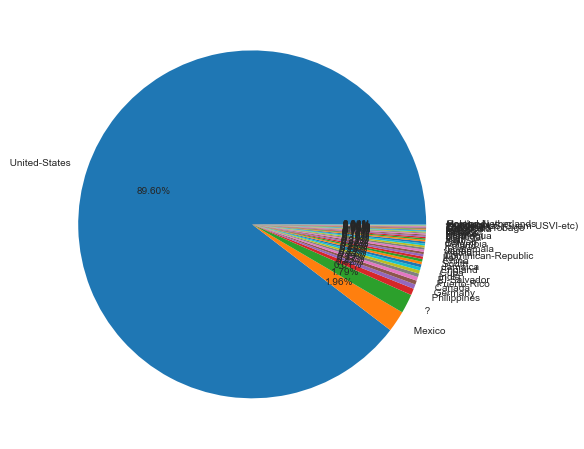

In [182]:
plt.figure(figsize=(12,8))
plt.pie(df['Native_country'].value_counts().values,labels=df['Native_country'].value_counts().index,autopct='%1.2f%%')

In [183]:
# distplot for integer type features

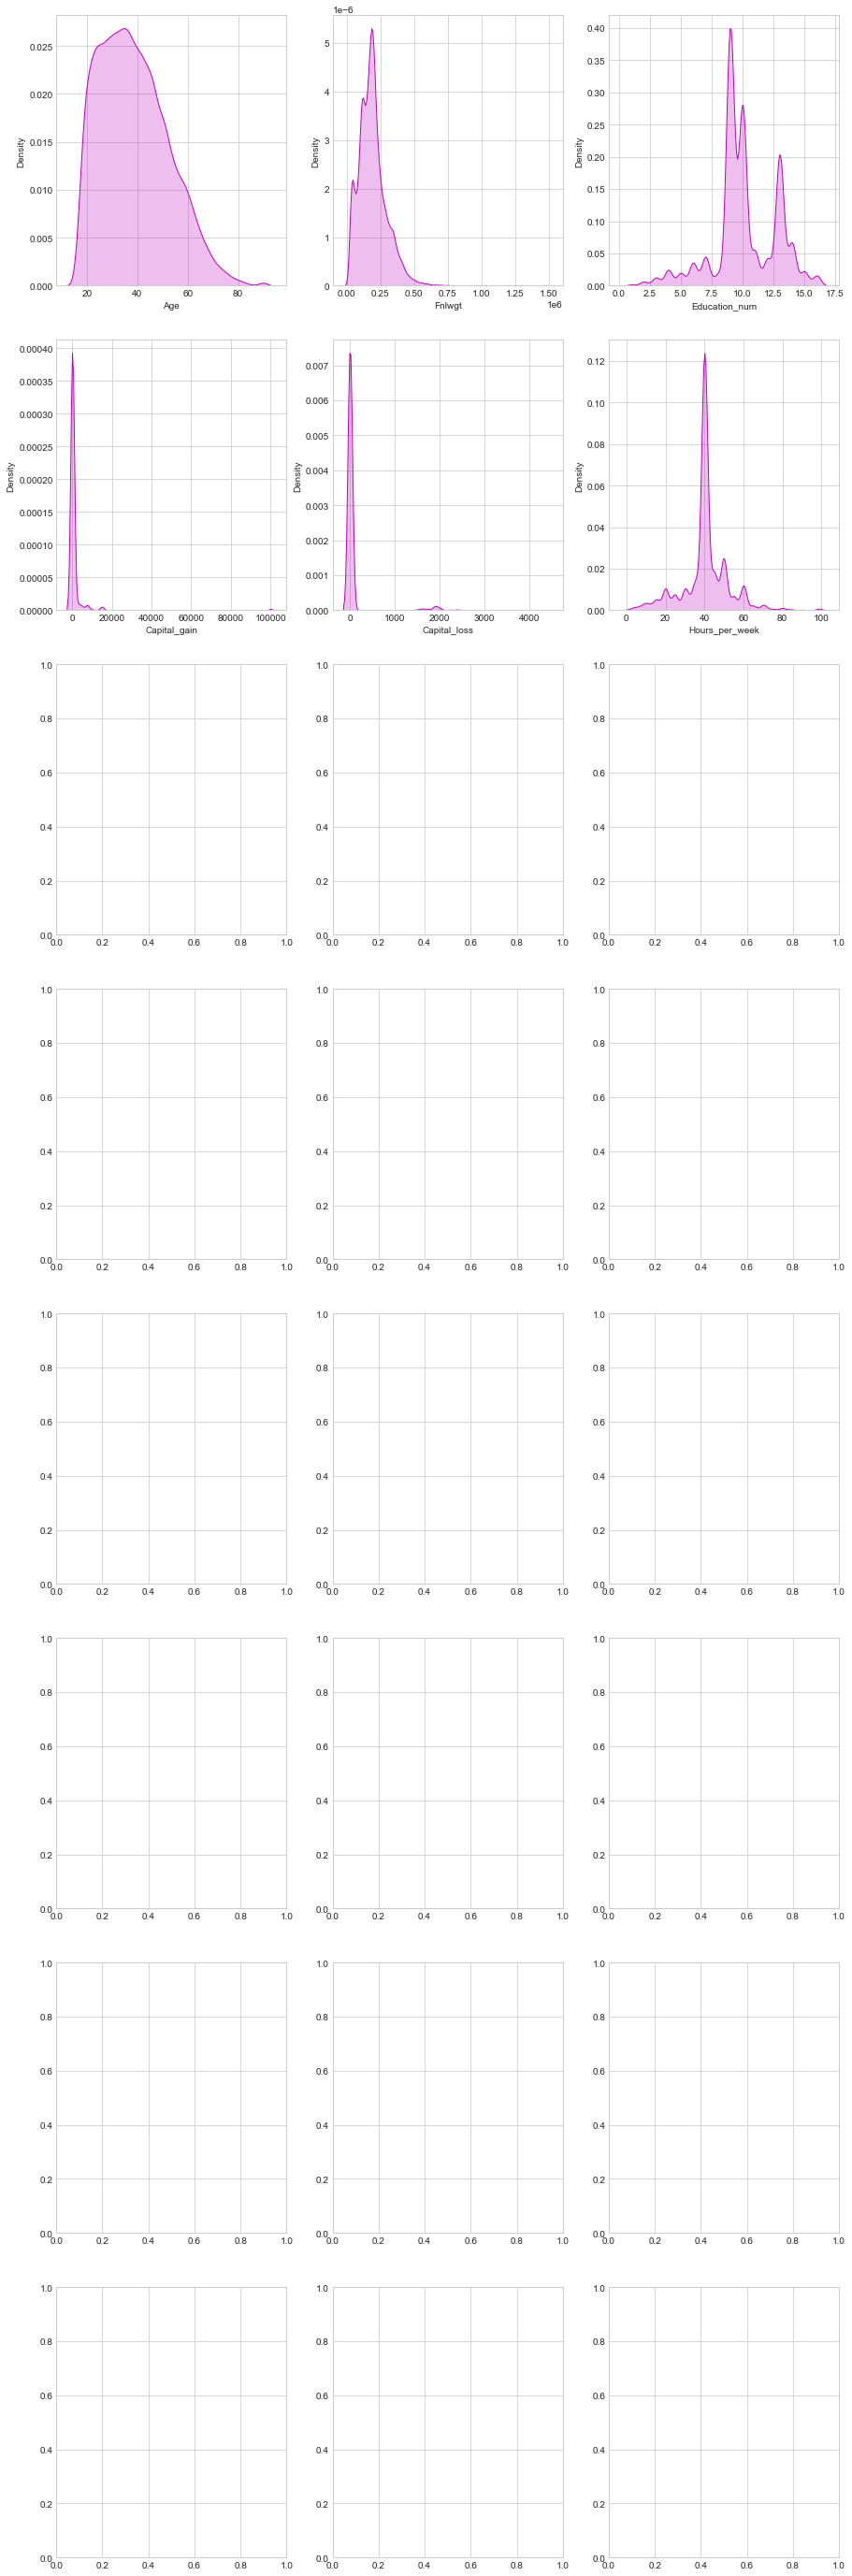

In [184]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatypes].items():
    sns.distplot(value, ax=ax[index], hist=False, color="m", kde_kws={"shade": True})
    index += 1
plt.show()

In [185]:
# from the above it is clear that there are some skewnesses in some of the graphs and they have to be rectified!

In [186]:
# to check the outliers let's check the boxplots first...

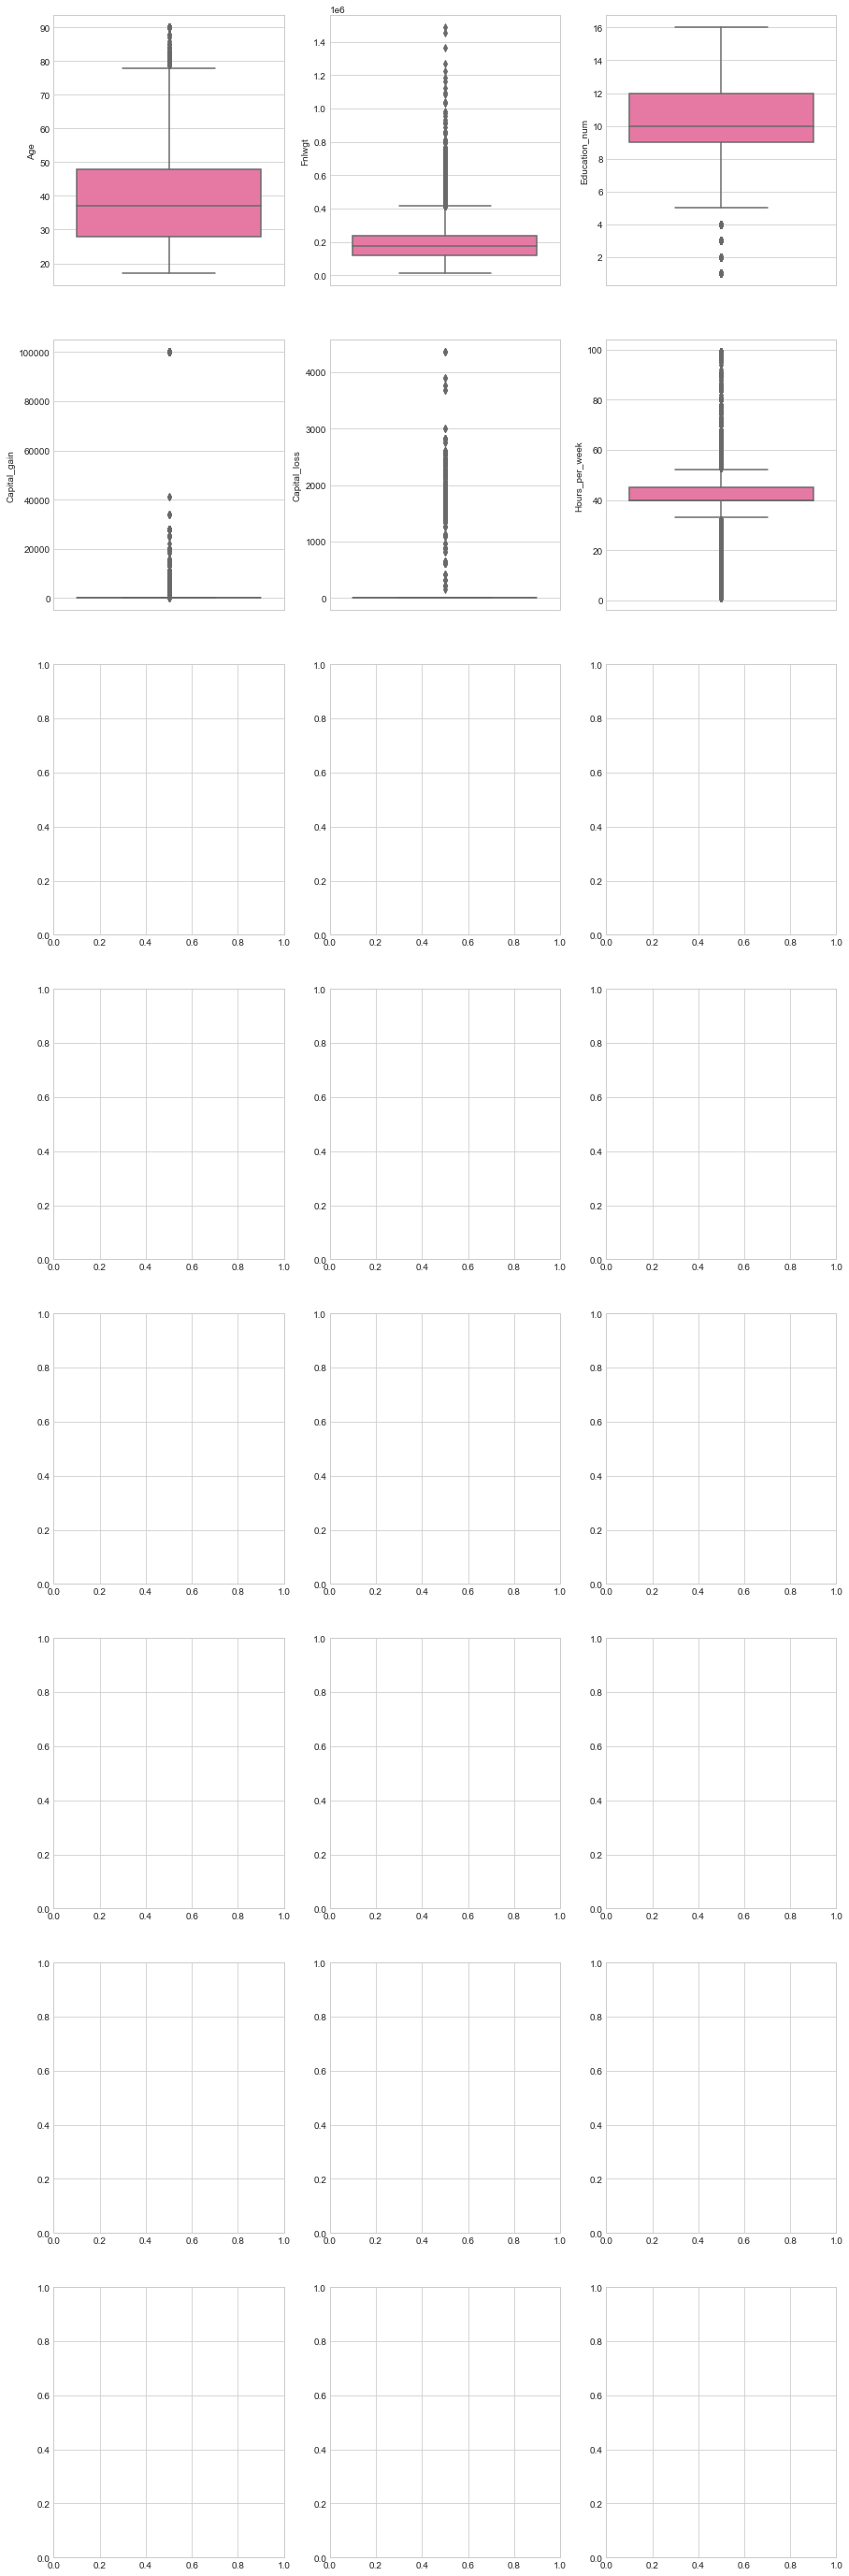

In [187]:
# Boxplot for the integer type features 

fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatypes].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="RdPu")
    index += 1
plt.show()

In [188]:
# from above clearly all the features have outliers and mostly they are of continuous format.

In [189]:
# Encoding the object datatype columns

In [190]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Income']=le.fit_transform(df['Income'])

df['Income']

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 32536, dtype: int32

In [191]:
# target column was object datatype so it is converted into integer type.
# 0 means: <=50K
# 1 means: >50K

In [192]:
# let us now convert the remaining 8 feature columns which are also object data type

from sklearn.preprocessing import OrdinalEncoder
oec = OrdinalEncoder()

df['Workclass'] = oec.fit_transform(df['Workclass'].values.reshape(-1,1))
df['Education'] = oec.fit_transform(df['Education'].values.reshape(-1,1))
df['Marital_status'] = oec.fit_transform(df['Marital_status'].values.reshape(-1,1))
df['Occupation'] = oec.fit_transform(df['Occupation'].values.reshape(-1,1))
df['Relationship'] = oec.fit_transform(df['Relationship'].values.reshape(-1,1))
df['Race'] = oec.fit_transform(df['Race'].values.reshape(-1,1))
df['Sex'] = oec.fit_transform(df['Sex'].values.reshape(-1,1))
df['Native_country'] = oec.fit_transform(df['Native_country'].values.reshape(-1,1))

In [193]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0,0
32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0,1
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0,0
32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39.0,0


In [194]:
df.dtypes

Age                 int64
Workclass         float64
Fnlwgt              int64
Education         float64
Education_num       int64
Marital_status    float64
Occupation        float64
Relationship      float64
Race              float64
Sex               float64
Capital_gain        int64
Capital_loss        int64
Hours_per_week      int64
Native_country    float64
Income              int32
dtype: object

In [195]:
# we have successfully changed all the object type data into int or float type ones!

In [196]:
columns= ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income']

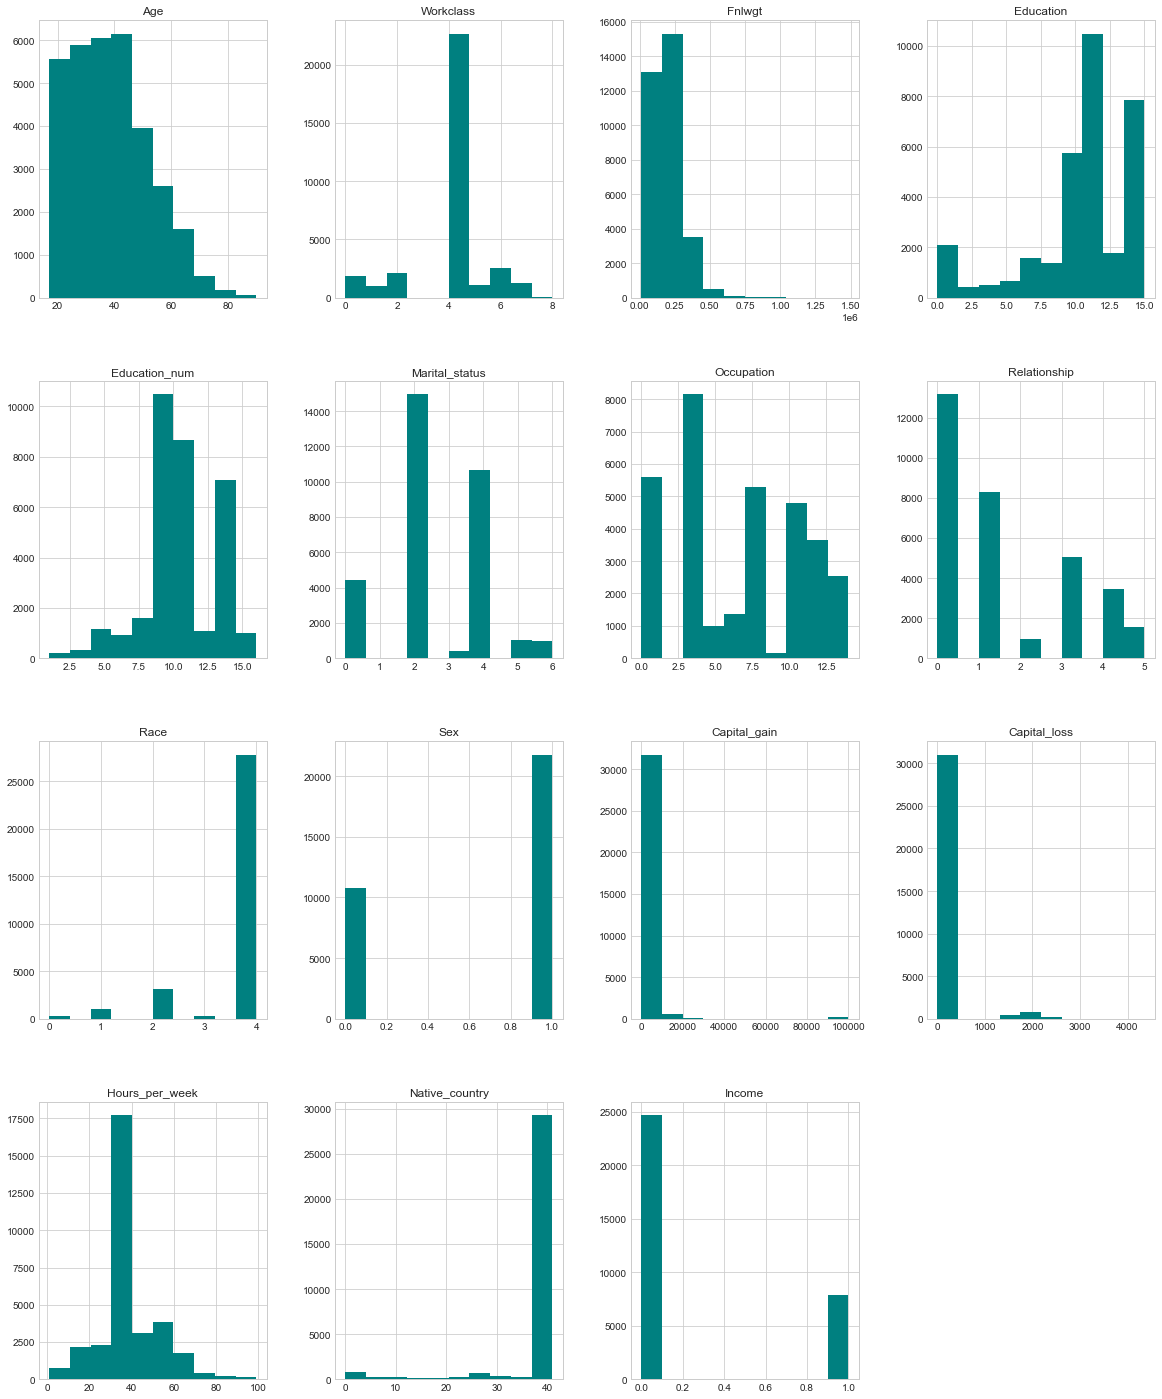

In [197]:
df.hist(figsize=(20,25), color= 'teal')
plt.show()

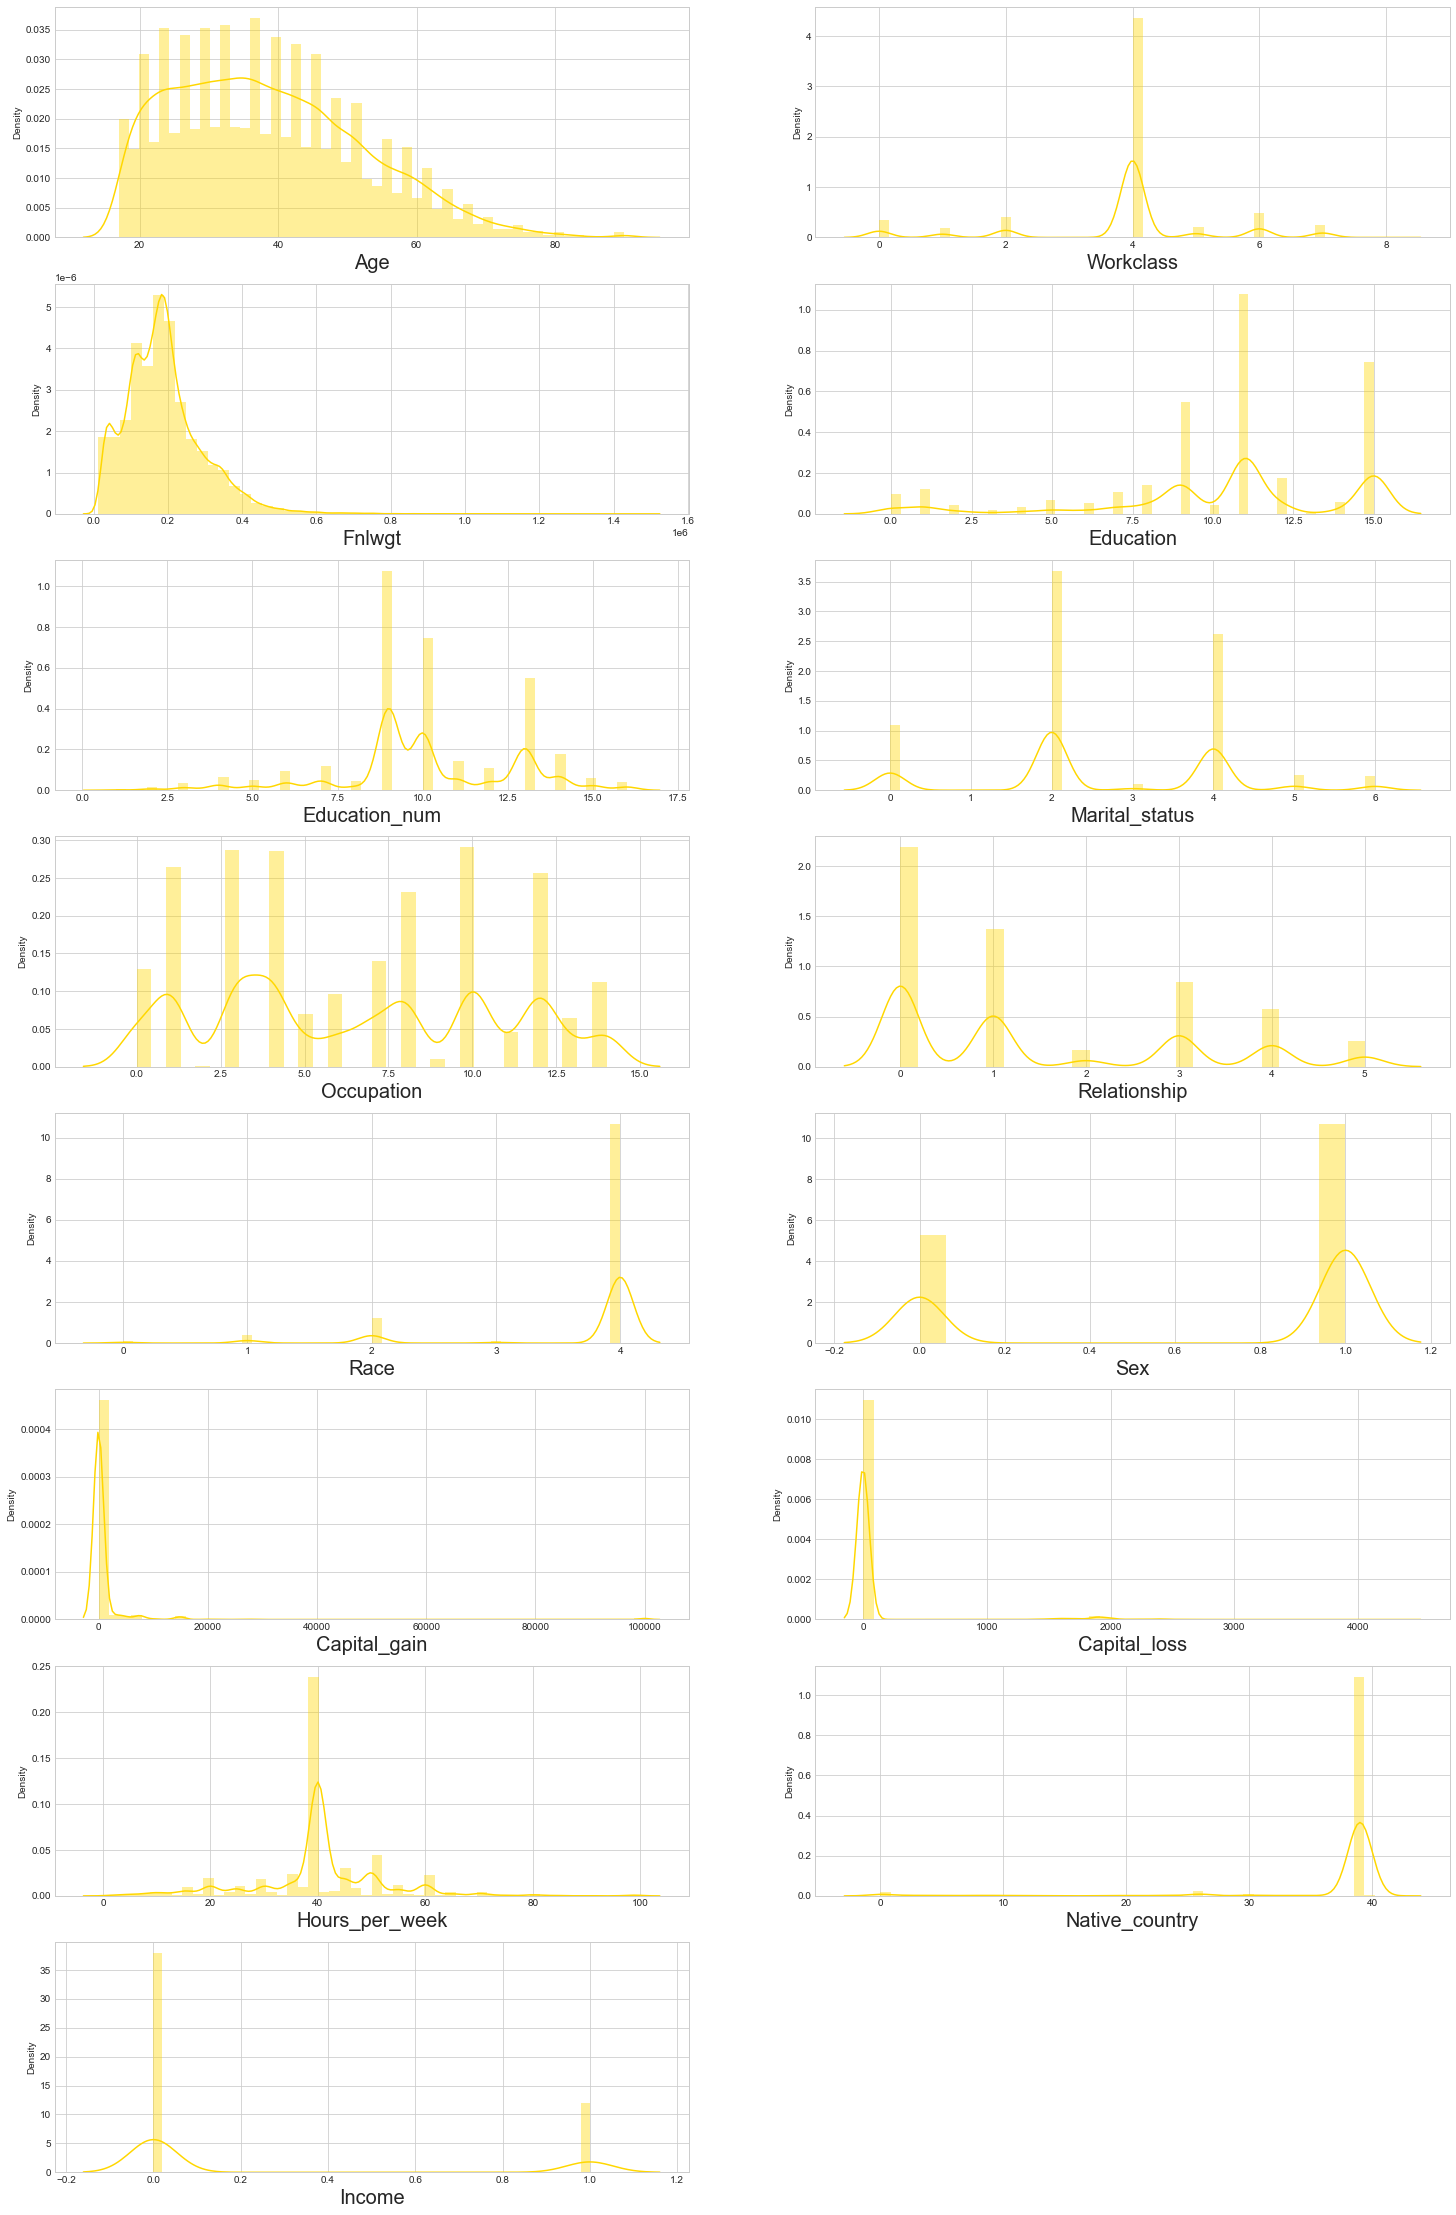

In [198]:
#Univariate Analysis

plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.distplot(df[column], color = 'gold')
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.show()

In [199]:
# mostly features are containing skenwness

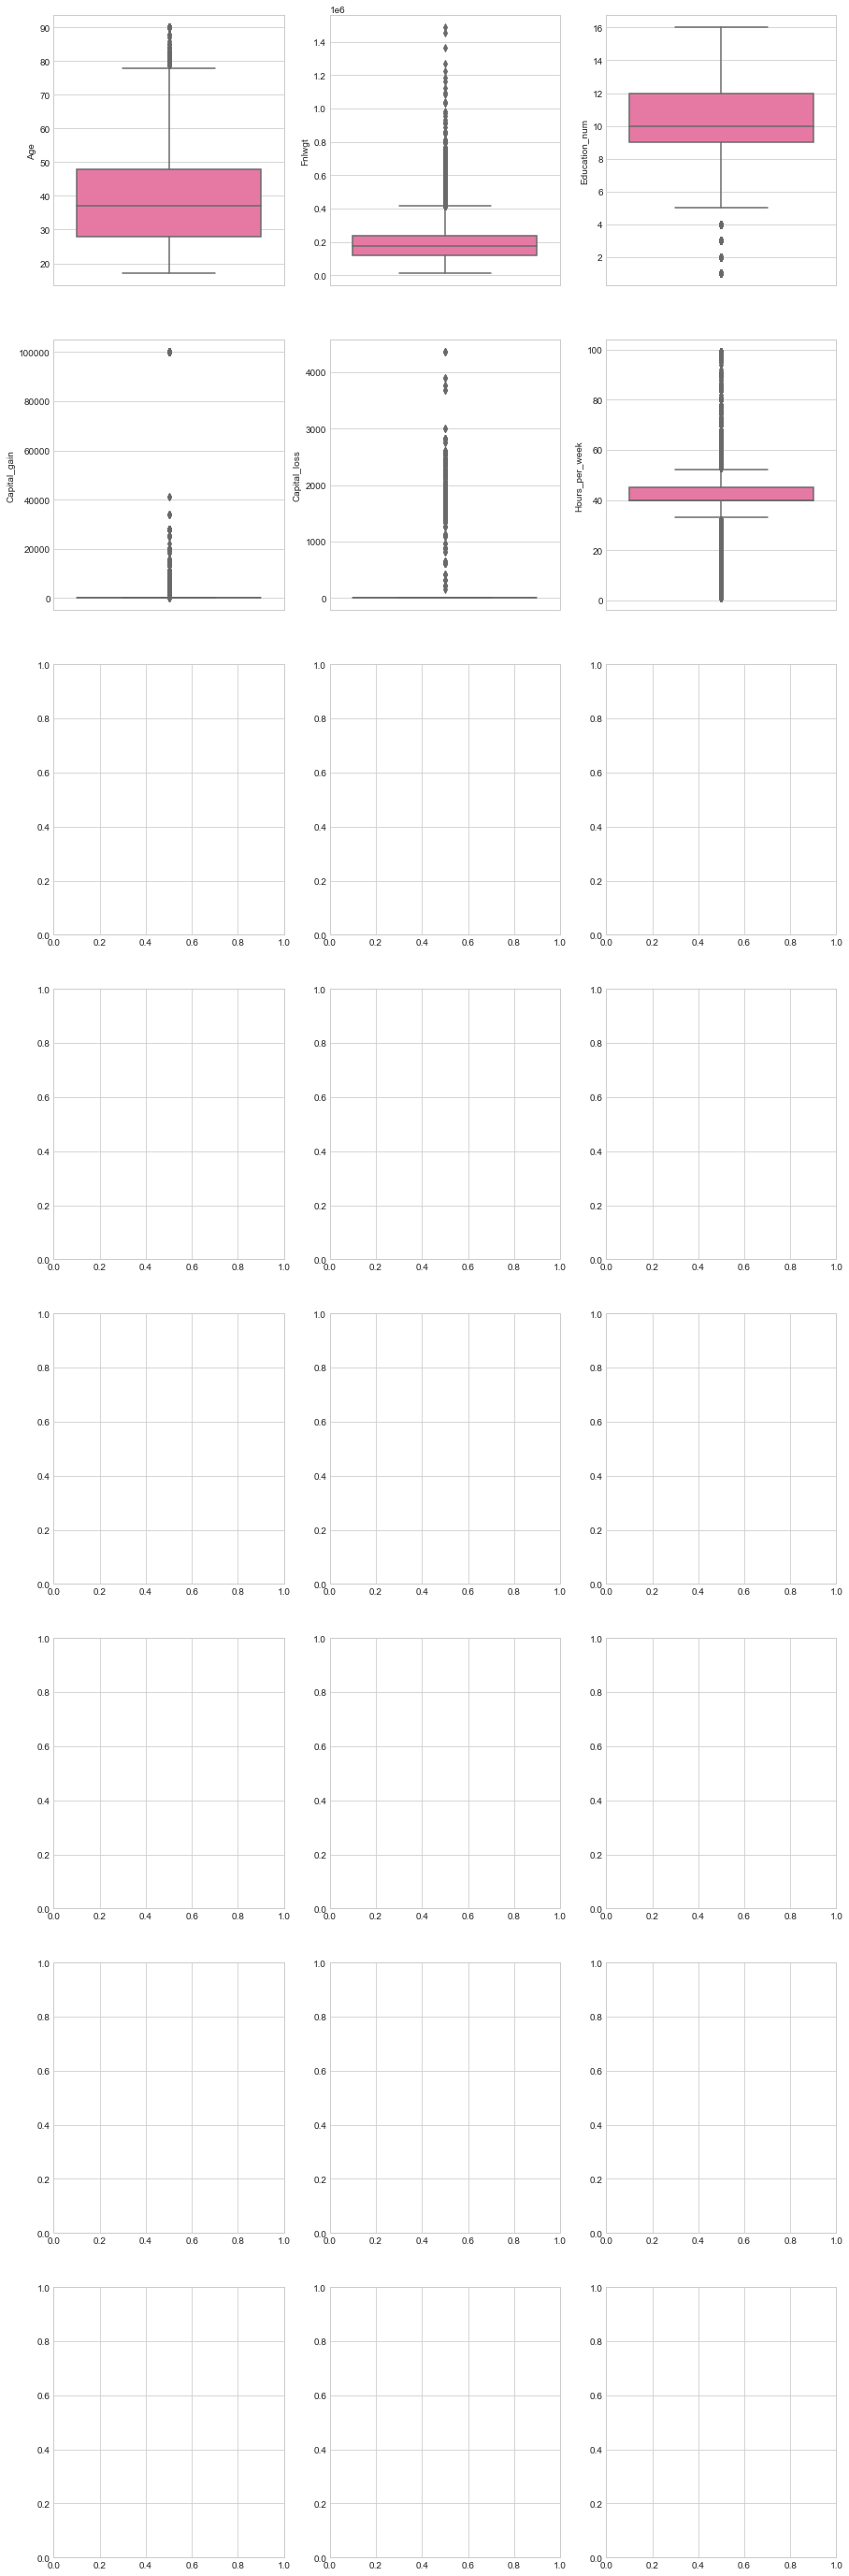

In [200]:
# Boxplot

fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatypes].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="RdPu")
    index += 1
plt.show()

In [201]:
# 6 features has outliers

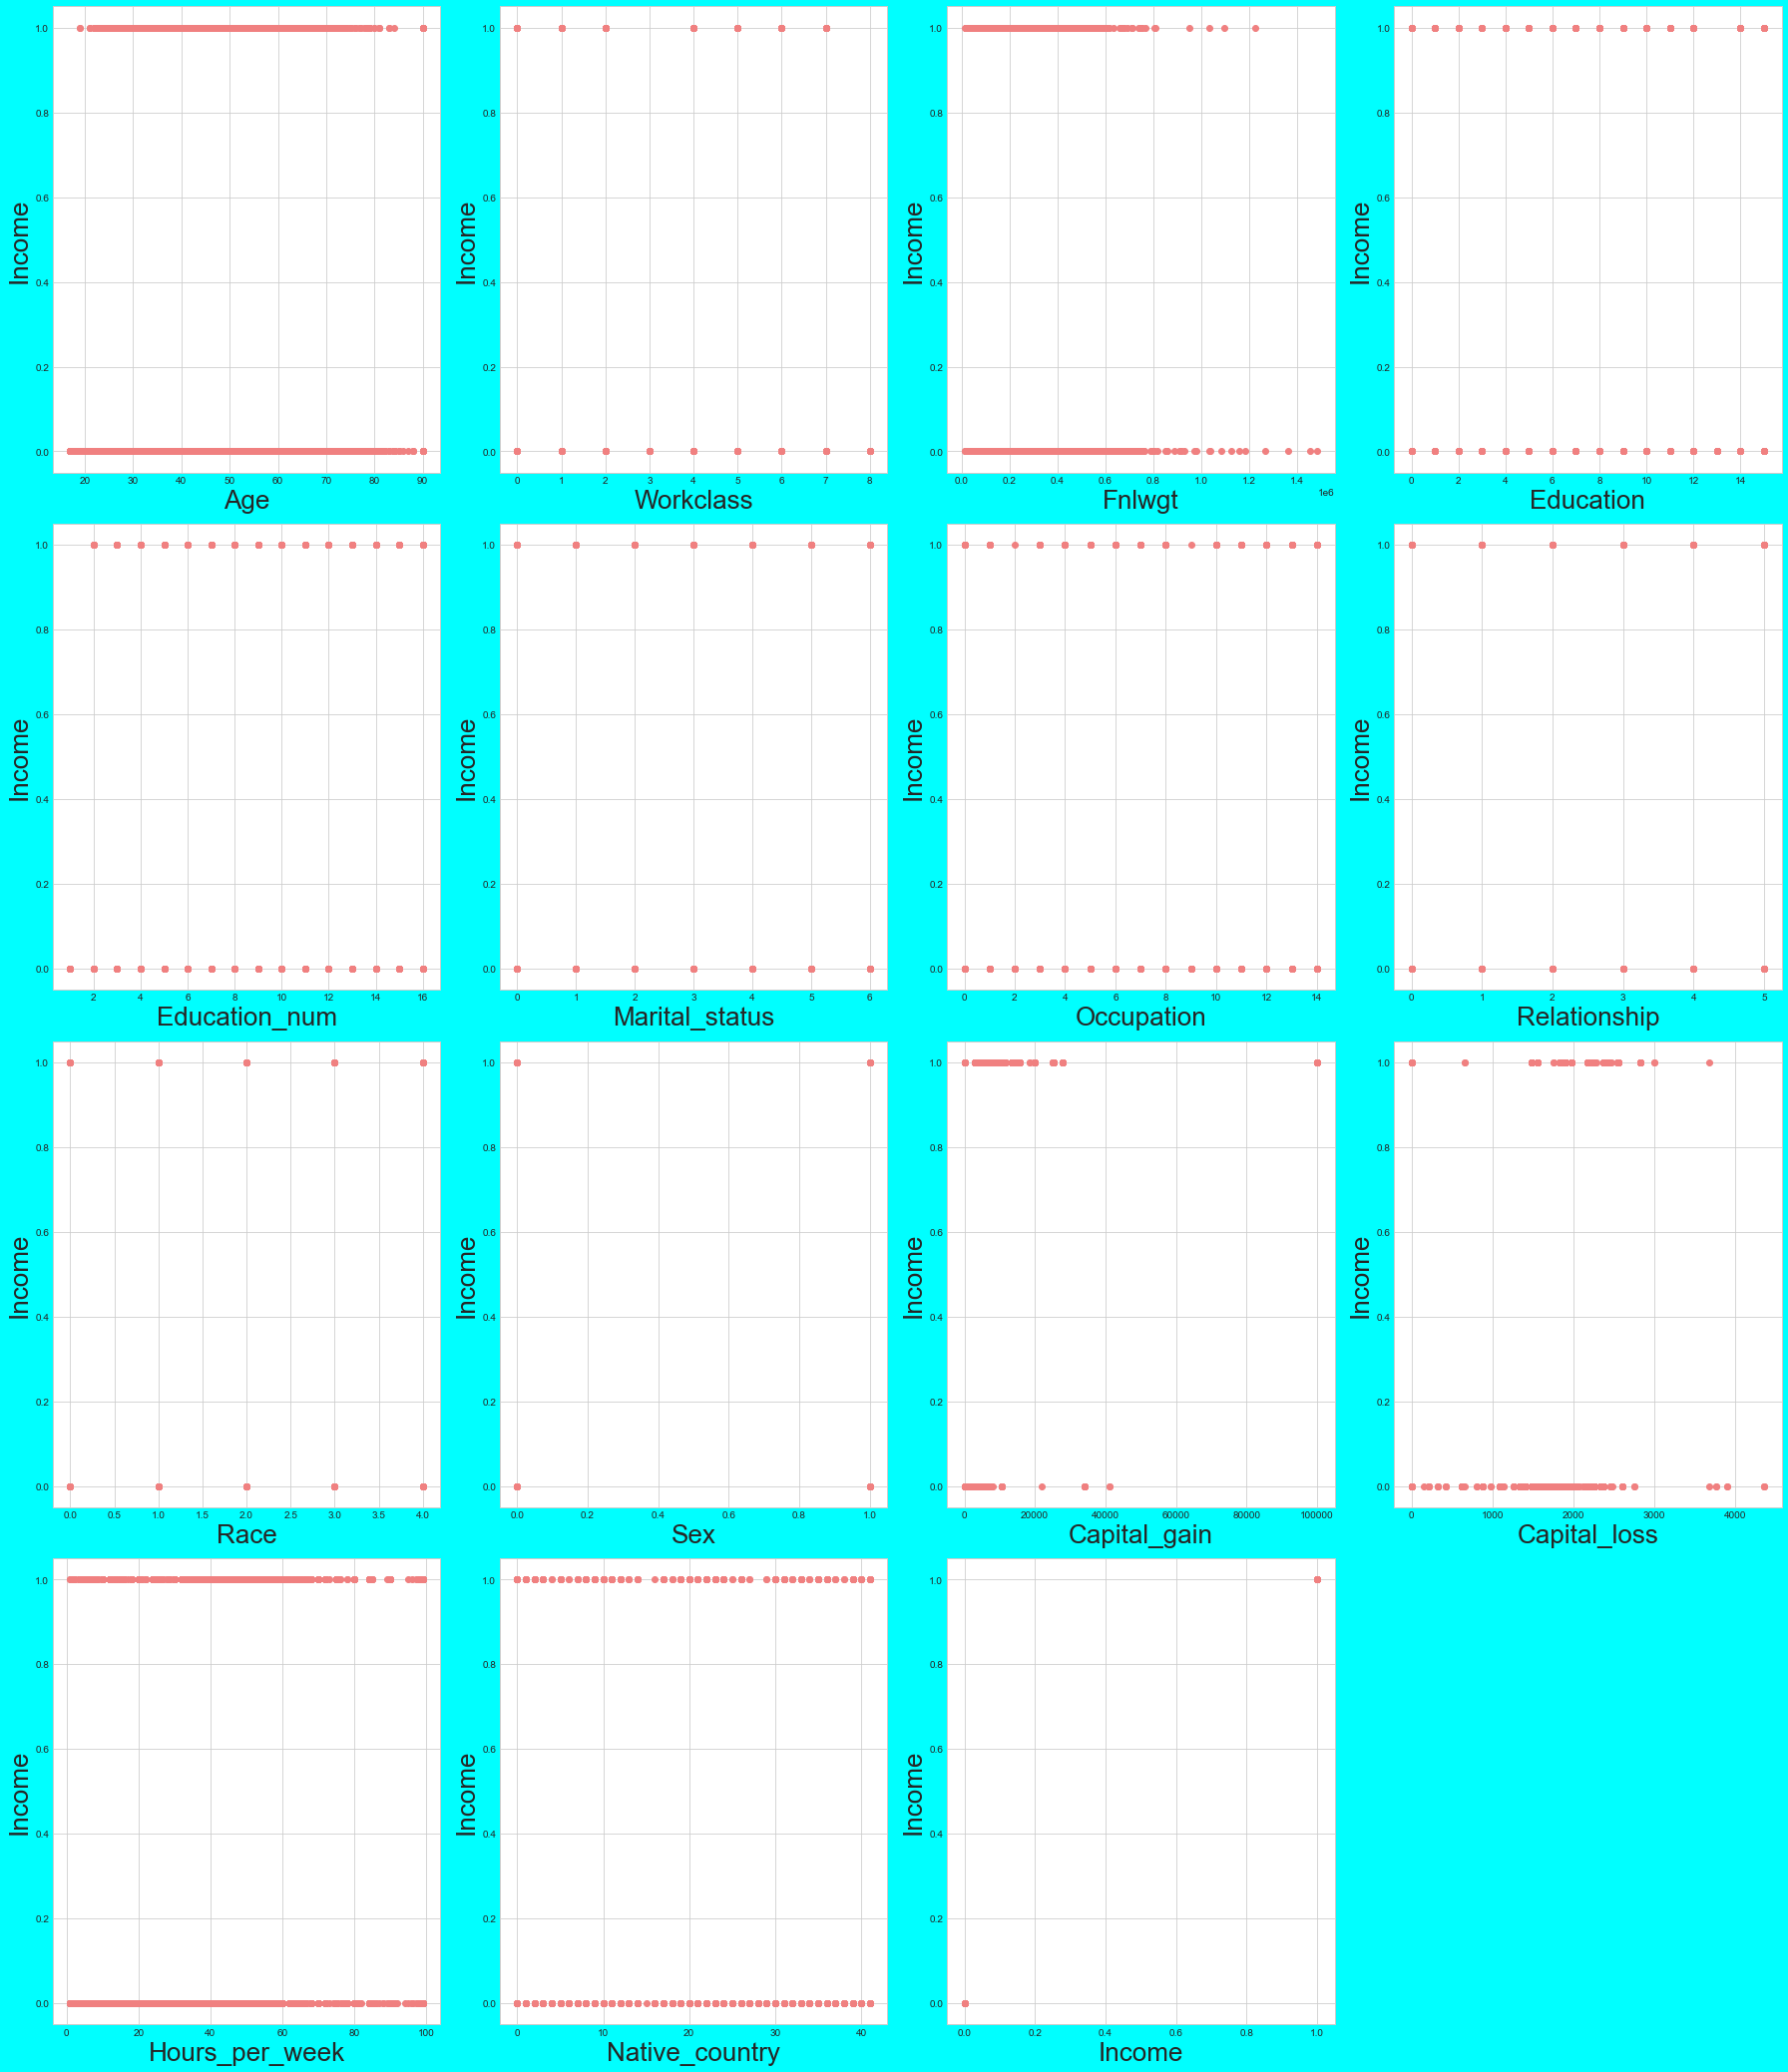

In [202]:
#Bivariate Analysis

plt.figure(figsize = (25,50), facecolor = 'cyan')
plotnumber = 1

for column in df:
    if plotnumber <=20:
        ax = plt.subplot(7,4,plotnumber)
        plt.scatter(df[column],df['Income'], color='lightcoral')
        plt.xlabel(column,fontsize=26)
        plt.ylabel('Income', fontsize=26)
    plotnumber += 1
plt.tight_layout()

<Figure size 1800x1440 with 0 Axes>

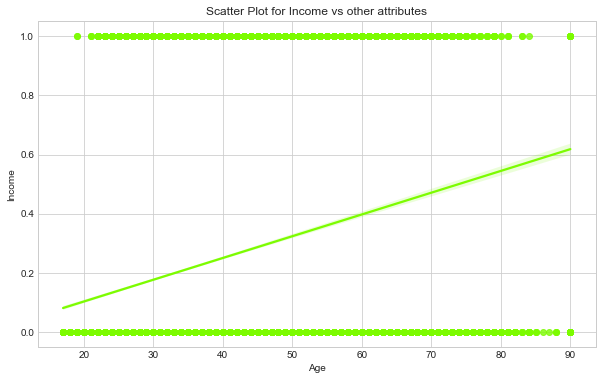

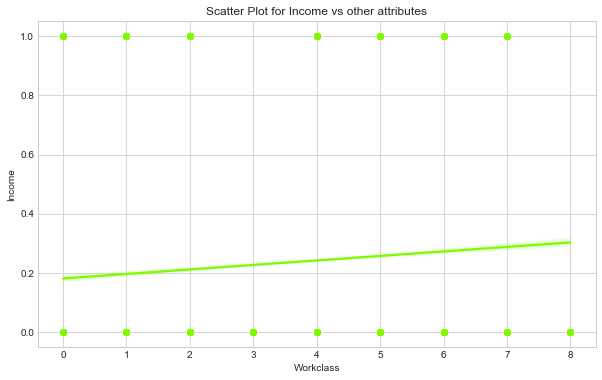

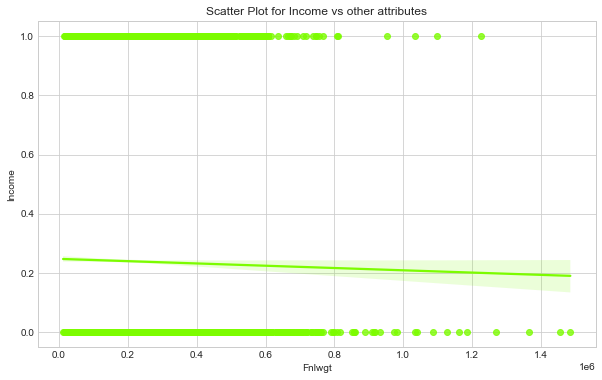

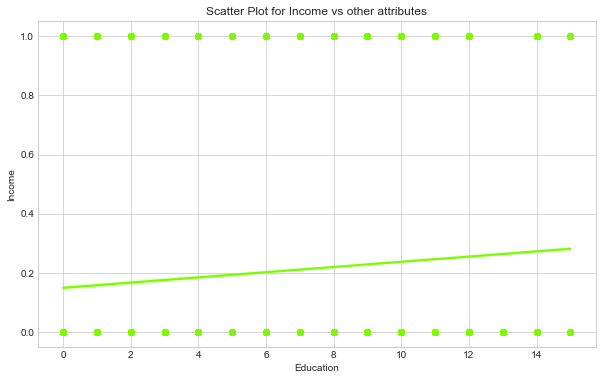

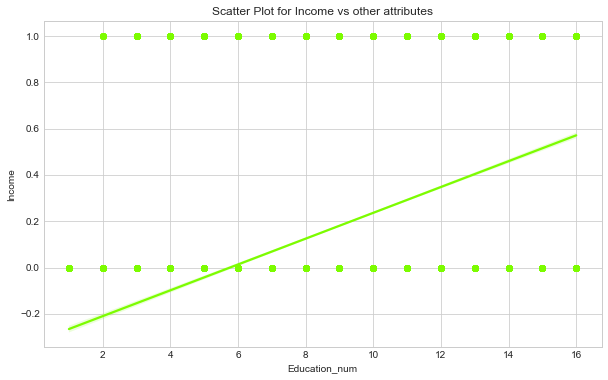

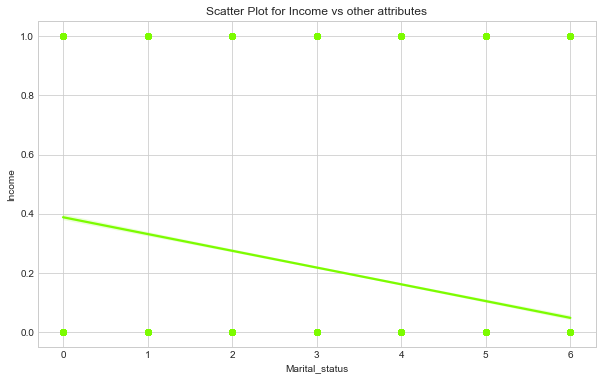

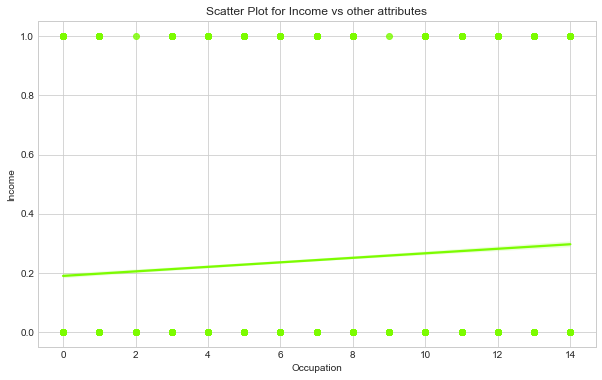

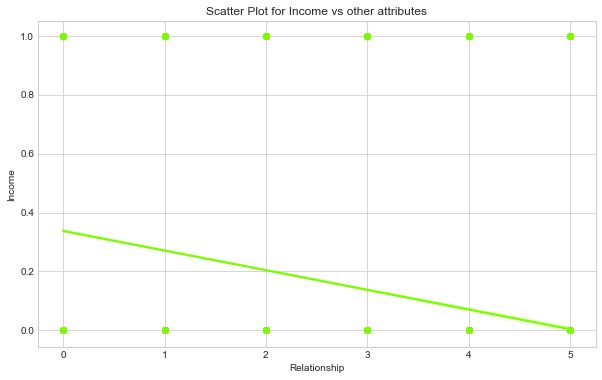

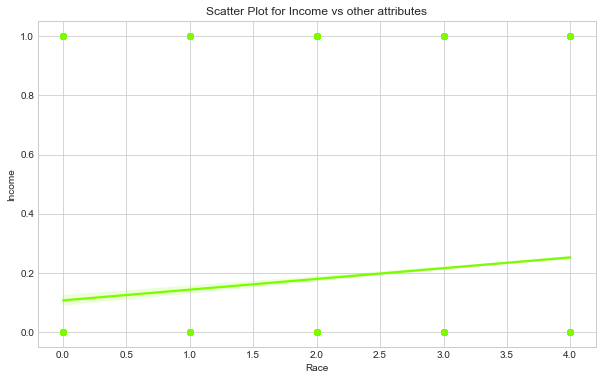

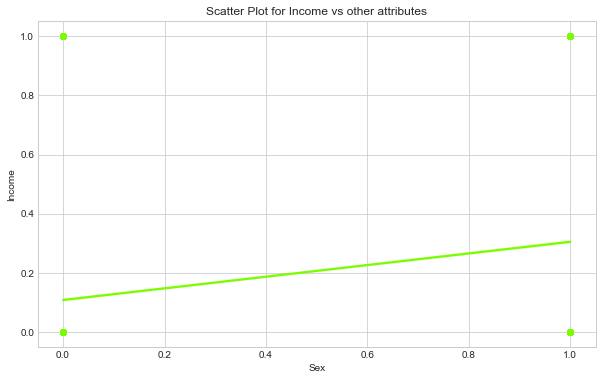

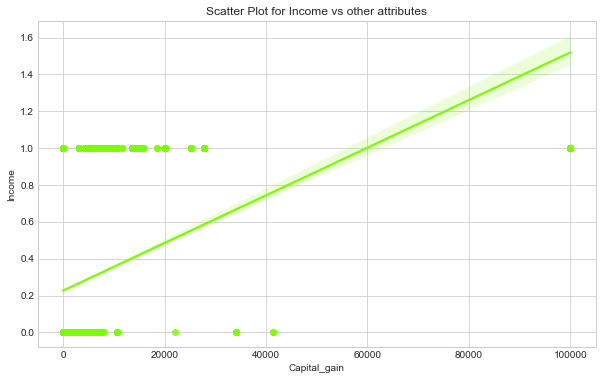

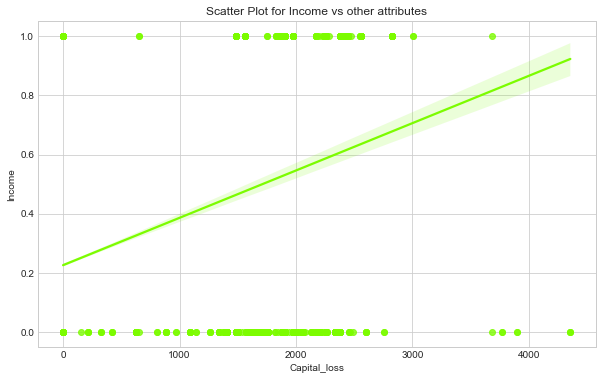

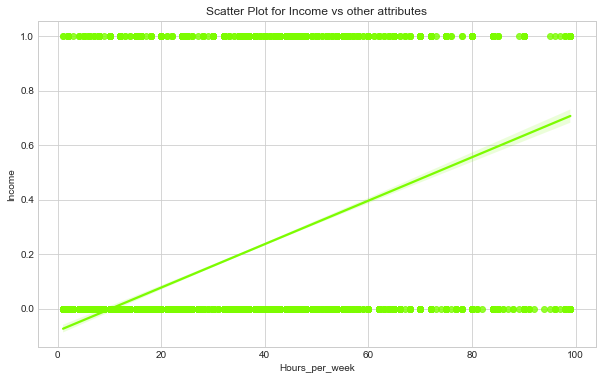

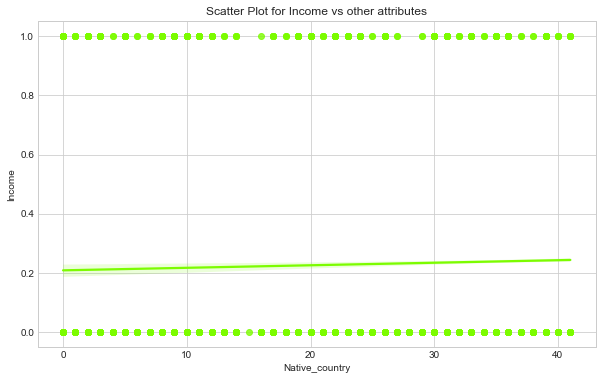

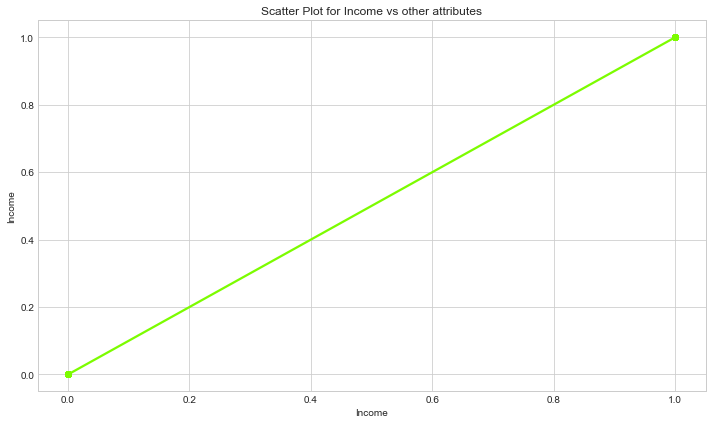

In [203]:
# Correlation analysis with scatterplot

plt.figure(figsize = (25,20), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=20:
        plt.figure(figsize = (10,6))
        sns.regplot(df[column], df['Income'], color= 'lawngreen')
        plt.title('Scatter Plot for Income vs other attributes')
        plt.xlabel(column)
        plt.ylabel('Income')
        
plt.tight_layout()

In [204]:
# there are diverse correlation between the features

In [205]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003781,-0.076448,-0.010551,0.036224,-0.266142,-0.020911,-0.263744,0.029116,0.088708,0.077676,0.057745,0.068515,-0.001524,0.234039
Workclass,0.003781,1.000000,-0.016532,0.023480,0.052099,-0.064828,0.255105,-0.090421,0.049717,0.095960,0.033845,0.012255,0.139059,-0.007697,0.051706
Fnlwgt,-0.076448,-0.016532,1.000000,-0.028065,-0.043353,0.028154,0.001360,0.008859,-0.021484,0.027113,0.000433,-0.010267,-0.018900,-0.051866,-0.009521
Education,-0.010551,0.023480,-0.028065,1.000000,0.359105,-0.038413,-0.021249,-0.011060,0.014307,-0.027426,0.030086,0.016790,0.055991,0.063874,0.079361
Education_num,0.036224,0.052099,-0.043353,0.359105,1.000000,-0.069196,0.109804,-0.094424,0.031998,0.012181,0.122661,0.079901,0.148426,0.050127,0.335299
Marital_status,-0.266142,-0.064828,0.028154,-0.038413,-0.069196,1.000000,-0.009778,0.185542,-0.067942,-0.129425,-0.043373,-0.034134,-0.190433,-0.023414,-0.199187
Occupation,-0.020911,0.255105,0.001360,-0.021249,0.109804,-0.009778,1.000000,-0.075600,0.006811,0.080532,0.025513,0.017977,0.080502,-0.012394,0.075398
Relationship,-0.263744,-0.090421,0.008859,-0.011060,-0.094424,0.185542,-0.075600,1.000000,-0.116048,-0.582593,-0.057945,-0.061100,-0.248876,-0.005634,-0.250955
Race,0.029116,0.049717,-0.021484,0.014307,0.031998,-0.067942,0.006811,-0.116048,1.000000,0.087464,0.011152,0.018916,0.041921,0.137847,0.071855
Sex,0.088708,0.095960,0.027113,-0.027426,0.012181,-0.129425,0.080532,-0.582593,0.087464,1.000000,0.048486,0.045576,0.229190,-0.008262,0.215984


<AxesSubplot:>

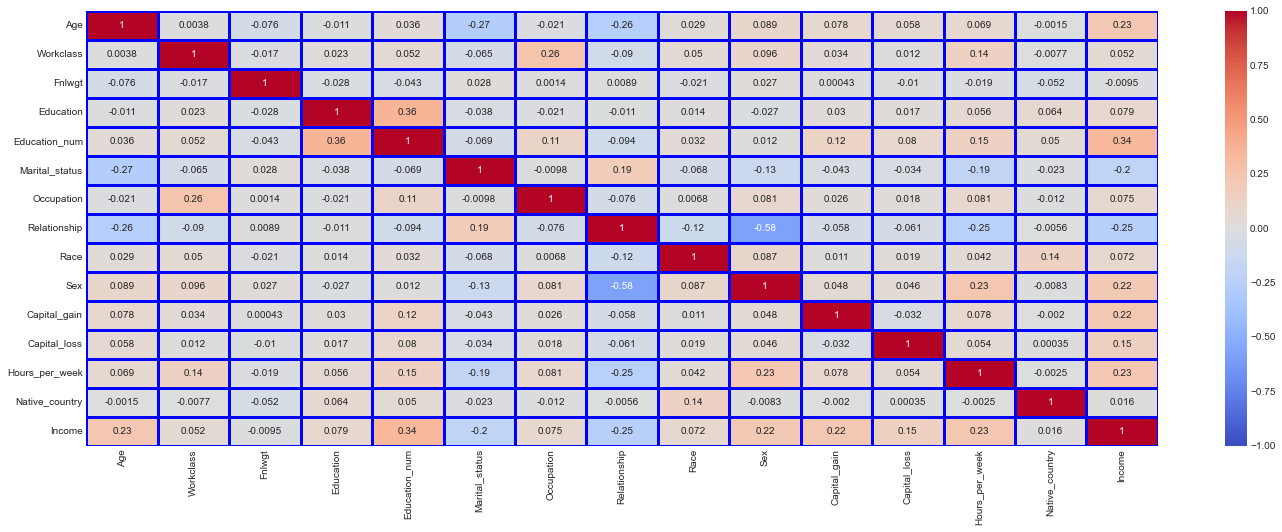

In [206]:
#let us make a heatmap

import matplotlib.pyplot as plt
plt.figure(figsize=(24,8))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='blue')

In [207]:
# let us now check for the skewness
df.skew()

Age                0.557657
Workclass         -0.751854
Fnlwgt             1.447695
Education         -0.934180
Education_num     -0.309454
Marital_status    -0.012692
Occupation         0.114542
Relationship       0.786514
Race              -2.435283
Sex               -0.719400
Capital_gain      11.949245
Capital_loss       4.592622
Hours_per_week     0.228752
Native_country    -3.661060
Income             1.211640
dtype: float64

In [208]:
# skewness is present!

In [209]:
# let us work for the outliers

In [210]:
# Using Z Score to remove outliers

from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold= 3
np.where(z>3)

(array([    3,     9,    10, ..., 32508, 32526, 32528], dtype=int64),
 array([13, 12,  8, ...,  8,  8,  8], dtype=int64))

In [211]:
df= df[(z<3).all(axis=1)]
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0
5,49,4.0,160187,6.0,5,3.0,8.0,1.0,2.0,0.0,0,0,16,23.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0,0
32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0,1
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0,0
32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39.0,0


In [212]:
# now again check the boxplot

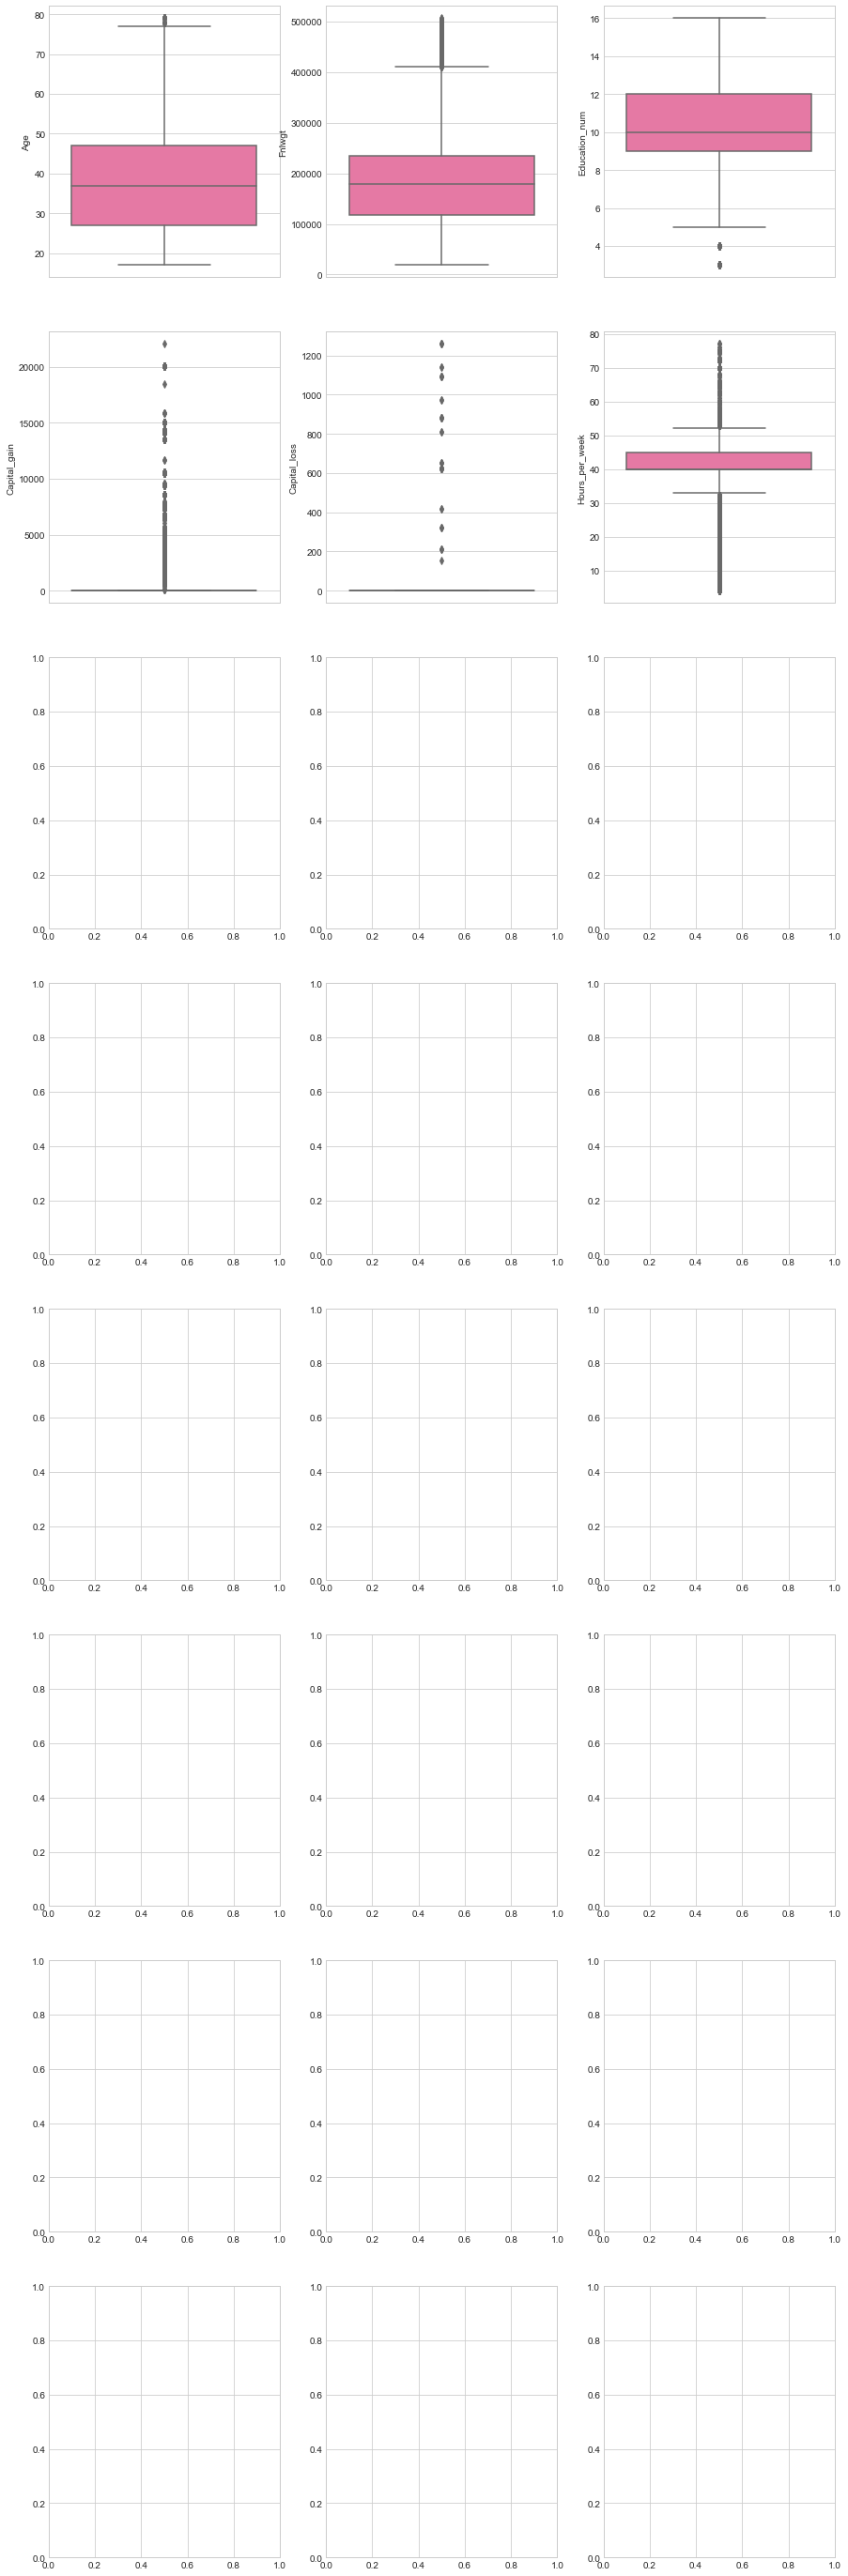

In [213]:
# Boxplot

fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatypes].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="RdPu")
    index += 1
plt.show()

In [214]:
# There are still presence of outliers but since they are in continous format we shall ignore it

In [215]:
df.skew()

Age                0.483537
Workclass         -0.737658
Fnlwgt             0.627331
Education         -0.957459
Education_num     -0.143317
Marital_status    -0.043793
Occupation         0.130948
Relationship       0.749953
Race              -2.592371
Sex               -0.684100
Capital_gain       4.933077
Capital_loss      29.316076
Hours_per_week    -0.357277
Native_country    -5.466051
Income             1.324408
dtype: float64

In [216]:
# Using Log Transform to fix skewness

In [217]:
for col in integer_datatypes:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [218]:
# Log Transformation has been applied on our numerical integer datatype columns

In [219]:
# now let's check the skewness again

In [220]:
df.skew()

Age                0.483537
Workclass         -0.737658
Fnlwgt            -0.955214
Education         -0.957459
Education_num     -0.143317
Marital_status    -0.043793
Occupation         0.130948
Relationship       0.749953
Race              -2.592371
Sex               -0.684100
Capital_gain       3.111491
Capital_loss      24.838742
Hours_per_week    -0.357277
Native_country    -5.466051
Income             1.324408
dtype: float64

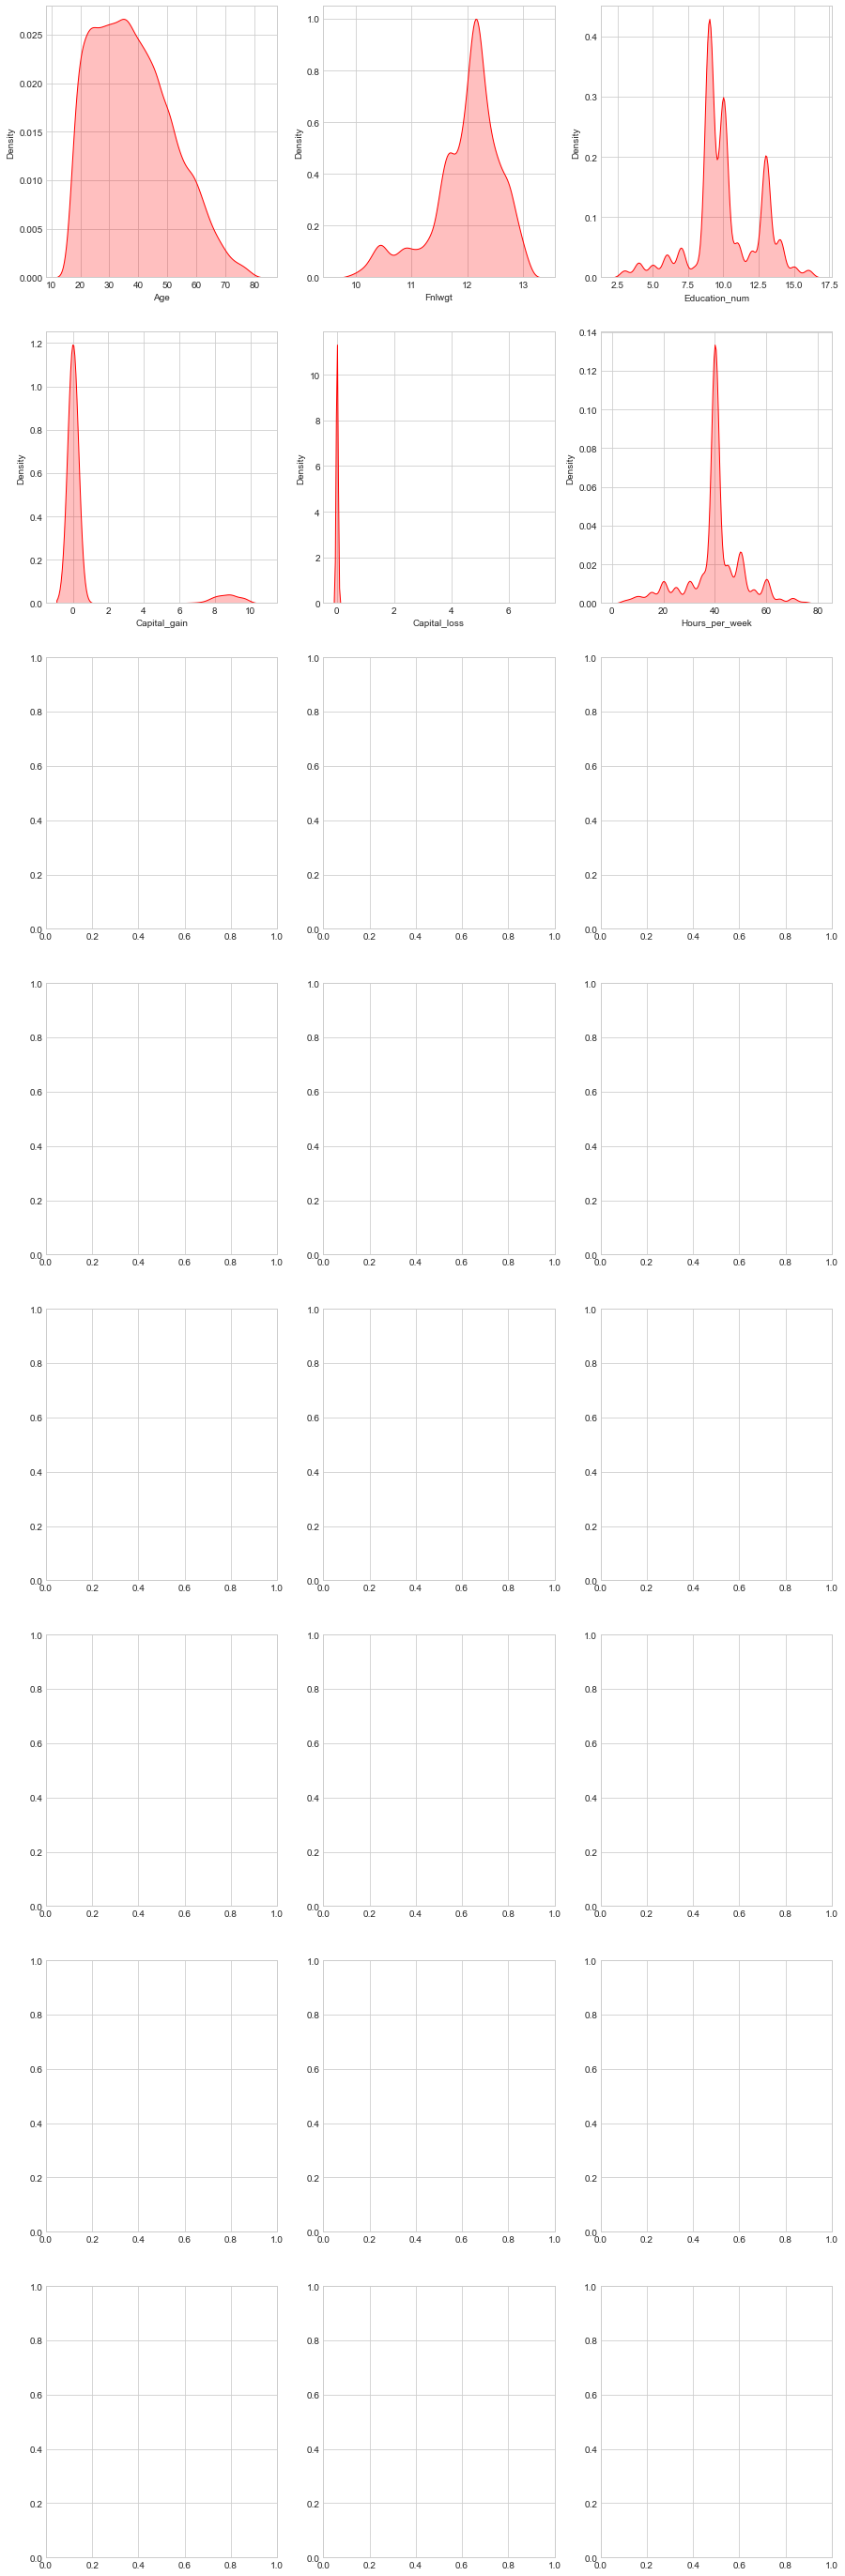

In [221]:
# visualize the skewness

fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatypes].items():
    sns.distplot(value, ax=ax[index], hist=False, color="r", kde_kws={"shade": True})
    index += 1
plt.show()

In [222]:
# Handle missing values

In [223]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [224]:
for i in df.columns:
    print( i ,'have unique values = ',df[i].unique(),'\n')

Age have unique values =  [50 38 53 37 49 52 31 42 23 32 25 43 40 54 35 59 56 19 20 30 22 48 21 24
 57 44 41 29 47 46 36 28 79 27 18 33 34 76 55 39 61 70 45 66 51 58 17 65
 26 64 60 77 62 63 67 72 74 69 71 68 73 78 75] 

Workclass have unique values =  [6. 4. 1. 2. 7. 5. 0. 8. 3.] 

Fnlwgt have unique values =  [11.33034788 12.28139809 12.36615711 ... 11.34642214 12.45800966
 11.9310501 ] 

Education have unique values =  [ 9. 11.  1. 12.  6.  7. 10. 15.  8.  4.  5. 14.  0.  2.] 

Education_num have unique values =  [13  9  7 14  5 12 16 10 11  3  4 15  6  8] 

Marital_status have unique values =  [2. 0. 3. 4. 5. 6. 1.] 

Occupation have unique values =  [ 4.  6.  8. 10.  1. 12.  5.  7. 13.  3. 11. 14.  0.  2.  9.] 

Relationship have unique values =  [0. 1. 5. 3. 4. 2.] 

Race have unique values =  [4. 2. 3.] 

Sex have unique values =  [1. 0.] 

Capital_gain have unique values =  [ 0.          9.55286568  8.55236727  8.51998928  7.78655181  9.57115673
  9.61747076  8.94754602  8.3101

In [225]:
# there is no missing values there in the data set

In [226]:
# Train-Test split

X = df.drop('Income', axis=1)
y = df['Income']

In [227]:
X

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,6.0,11.330348,9.0,13,2.0,4.0,0.0,4.0,1.0,0.000000,0.0,13,39.0
1,38,4.0,12.281398,11.0,9,0.0,6.0,1.0,4.0,1.0,0.000000,0.0,40,39.0
2,53,4.0,12.366157,1.0,7,2.0,6.0,0.0,2.0,1.0,0.000000,0.0,40,39.0
4,37,4.0,12.558780,12.0,14,2.0,4.0,5.0,4.0,0.0,0.000000,0.0,40,39.0
5,49,4.0,11.984103,6.0,5,3.0,8.0,1.0,2.0,0.0,0.000000,0.0,16,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,12.458010,7.0,12,2.0,13.0,5.0,4.0,0.0,0.000000,0.0,38,39.0
32556,40,4.0,11.947140,11.0,9,2.0,7.0,0.0,4.0,1.0,0.000000,0.0,40,39.0
32557,58,4.0,11.931050,11.0,9,6.0,1.0,4.0,4.0,0.0,0.000000,0.0,40,39.0
32558,22,4.0,12.213500,11.0,9,4.0,1.0,3.0,4.0,1.0,0.000000,0.0,20,39.0


In [228]:
y

0        0
1        0
2        0
4        0
5        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 27399, dtype: int32

In [229]:
# check class imbalance

In [230]:
y.value_counts()

0    21263
1     6136
Name: Income, dtype: int64

In [231]:
# This indicates class imbalance that needed to be fixed by using the oversampling method

In [232]:
# Synthetic Minority Over-sampling Technique (SMOTE)

In [233]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [234]:
y.value_counts()

0    21263
1    21263
Name: Income, dtype: int64

In [235]:
# class imbalance problem is solved!

In [236]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.781935,1.533189,-1.139513,-0.429488,1.010762,-0.318873,-0.661614,-0.728369,0.306417,0.606993,-0.378958,-0.034707,-2.654001,0.173874
1,-0.168213,0.063633,0.524478,0.138464,-0.634341,-1.848377,-0.183725,-0.102903,0.306417,0.606993,-0.378958,-0.034707,-0.152241,0.173874
2,1.019471,0.063633,0.672776,-2.701294,-1.456893,-0.318873,-0.183725,-0.728369,-3.502918,0.606993,-0.378958,-0.034707,-0.152241,0.173874
3,-0.247392,0.063633,1.009796,0.422439,1.422038,-0.318873,-0.661614,2.398962,0.306417,-1.695730,-0.378958,-0.034707,-0.152241,0.173874
4,0.702756,0.063633,0.004321,-1.281415,-2.279445,0.445879,0.294164,-0.102903,-3.502918,-1.695730,-0.378958,-0.034707,-2.376028,-6.188219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42521,-0.089034,0.531311,-0.202817,-0.429488,1.010762,-0.318873,1.249942,-0.728369,0.306417,0.606993,-0.378958,-0.034707,0.774337,0.173874
42522,0.386040,2.267966,-2.501275,0.422439,1.422038,-0.318873,0.772053,-0.728369,0.306417,0.606993,-0.378958,-0.034707,1.700915,0.173874
42523,-0.089034,0.063633,-1.290363,0.429693,1.422038,-0.318873,0.772053,-0.728369,0.306417,0.606993,-0.378958,-0.034707,-0.152241,0.173874
42524,-0.484929,0.063633,1.732245,1.274367,-0.223065,-0.318873,-0.661807,-0.728369,0.306417,0.606993,-0.378958,-0.034707,0.774337,0.173874


In [237]:
# modelling and train and test split

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

lr= LogisticRegression()
dt= DecisionTreeClassifier()
rf= RandomForestClassifier()
svc= SVC()
knc= KNeighborsClassifier()
bag= BaggingClassifier()
ada= AdaBoostClassifier()
gb= GradientBoostingClassifier()

In [238]:
# LogisticRegression

In [239]:
#best random state for logistic regression.
maxAccu= 0
maxRS= 0

for i in range(1,200):
    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= .20, random_state= i)
    lr= LogisticRegression()
    lr.fit(X_train, y_train)
    prediction= lr.predict(X_test)
    acc= accuracy_score(y_test, prediction)
    print('accuracy', acc, 'random_state', i)
    
    if acc> maxAccu:
        maxAccu=acc
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

accuracy 0.7667528803197743 random_state 1
max_accuracy 0.7667528803197743 max_random_state 1
accuracy 0.7679285210439689 random_state 2
max_accuracy 0.7679285210439689 max_random_state 2
accuracy 0.769691982130261 random_state 3
max_accuracy 0.769691982130261 max_random_state 3
accuracy 0.7628732659299318 random_state 4
accuracy 0.7572301904537974 random_state 5
accuracy 0.7722783917234893 random_state 6
max_accuracy 0.7722783917234893 max_random_state 6
accuracy 0.7712203150717141 random_state 7
accuracy 0.7683987773336468 random_state 8
accuracy 0.7612273689160592 random_state 9
accuracy 0.7608746766988008 random_state 10
accuracy 0.763931342581707 random_state 11
accuracy 0.7606395485539619 random_state 12
accuracy 0.7612273689160592 random_state 13
accuracy 0.7605219844815424 random_state 14
accuracy 0.7661650599576769 random_state 15
accuracy 0.7620503174229956 random_state 16
accuracy 0.7634610862920291 random_state 17
accuracy 0.7626381377850929 random_state 18
accuracy 0.76687

In [240]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.7775687749823654 on random_state 199


In [241]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 199)

# Training the model
lr.fit(X_train, y_train)
    
# Predicting Y_test
pred = lr.predict(X_test)
    
# Accuracy Score
acc_score = (accuracy_score(y_test, pred))*100
print("Accuracy Score:", acc_score)
    
# Classification Report
class_report = classification_report(y_test, pred)
print("\nClassification Report:\n", class_report)
    
# Cross Validation Score
cv_score = (cross_val_score(lr, X, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score: 77.11027509992945

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.76      0.77      4303
           1       0.76      0.79      0.77      4203

    accuracy                           0.77      8506
   macro avg       0.77      0.77      0.77      8506
weighted avg       0.77      0.77      0.77      8506

Cross Validation Score: 76.47323098554908

Accuracy Score - Cross Validation Score is 0.6370441143803731


In [242]:
# DecisionTreeClassifier

In [243]:
#best random state 
maxAccu= 0
maxRS= 0

for i in range(1,200):
    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= .20, random_state= i)
    dt= DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    prediction= dt.predict(X_test)
    acc= accuracy_score(y_test, prediction)
    print('accuracy', acc, 'random_state', i)
    
    if acc> maxAccu:
        maxAccu=acc
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

accuracy 0.8572772160827651 random_state 1
max_accuracy 0.8572772160827651 max_random_state 1
accuracy 0.8579826005172819 random_state 2
max_accuracy 0.8579826005172819 max_random_state 2
accuracy 0.8588055490242182 random_state 3
max_accuracy 0.8588055490242182 max_random_state 3
accuracy 0.8537502939101811 random_state 4
accuracy 0.8497531154479191 random_state 5
accuracy 0.8624500352692217 random_state 6
max_accuracy 0.8624500352692217 max_random_state 6
accuracy 0.8657418292969669 random_state 7
max_accuracy 0.8657418292969669 max_random_state 7
accuracy 0.8609217023277687 random_state 8
accuracy 0.855748883141312 random_state 9
accuracy 0.8639783682106749 random_state 10
accuracy 0.8604514460380908 random_state 11
accuracy 0.8553961909240536 random_state 12
accuracy 0.8610392664001881 random_state 13
accuracy 0.8662120855866448 random_state 14
max_accuracy 0.8662120855866448 max_random_state 14
accuracy 0.857747472372443 random_state 15
accuracy 0.8618622149071243 random_state 16


In [244]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.8686809311074536 on random_state 66


In [245]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 66)

# Training the model
dt.fit(X_train, y_train)
    
# Predicting Y_test
pred = dt.predict(X_test)
    
# Accuracy Score
acc_score = (accuracy_score(y_test, pred))*100
print("Accuracy Score:", acc_score)
    
# Classification Report
class_report = classification_report(y_test, pred)
print("\nClassification Report:\n", class_report)
    
# Cross Validation Score
cv_score = (cross_val_score(dt, X, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score: 86.63296496590642

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86      4252
           1       0.86      0.88      0.87      4254

    accuracy                           0.87      8506
   macro avg       0.87      0.87      0.87      8506
weighted avg       0.87      0.87      0.87      8506

Cross Validation Score: 85.5596183929648

Accuracy Score - Cross Validation Score is 1.073346572941631


In [246]:
# RandomForestClassifier

In [247]:
#best random state 
maxAccu= 0
maxRS= 0

for i in range(1,200):
    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= .20, random_state= i)
    rf= RandomForestClassifier()
    rf.fit(X_train, y_train)
    prediction= rf.predict(X_test)
    acc= accuracy_score(y_test, prediction)
    print('accuracy', acc, 'random_state', i)
    
    if acc> maxAccu:
        maxAccu=acc
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

accuracy 0.9015988713849048 random_state 1
max_accuracy 0.9015988713849048 max_random_state 1
accuracy 0.9000705384434516 random_state 2
accuracy 0.9000705384434516 random_state 3
accuracy 0.893134258170703 random_state 4
accuracy 0.8954855396190924 random_state 5
accuracy 0.8976016929226428 random_state 6
accuracy 0.9018339995297437 random_state 7
max_accuracy 0.9018339995297437 max_random_state 7
accuracy 0.8999529743710322 random_state 8
accuracy 0.9005407947331295 random_state 9
accuracy 0.9048906654126498 random_state 10
max_accuracy 0.9048906654126498 max_random_state 10
accuracy 0.8984246414295791 random_state 11
accuracy 0.897131436632965 random_state 12
accuracy 0.9012461791676464 random_state 13
accuracy 0.898894897719257 random_state 14
accuracy 0.8992475899365154 random_state 15
accuracy 0.899130025864096 random_state 16
accuracy 0.90265694803668 random_state 17
accuracy 0.9048906654126498 random_state 18
accuracy 0.9028920761815189 random_state 19
accuracy 0.89724900070538

In [248]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.9083000235128145 on random_state 125


In [249]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 125)

# Training the model
rf.fit(X_train, y_train)
    
# Predicting Y_test
pred = rf.predict(X_test)
    
# Accuracy Score
acc_score = (accuracy_score(y_test, pred))*100
print("Accuracy Score:", acc_score)
    
# Classification Report
class_report = classification_report(y_test, pred)
print("\nClassification Report:\n", class_report)
    
# Cross Validation Score
cv_score = (cross_val_score(rf, X, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", abs(result))

Accuracy Score: 90.83000235128145

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      4265
           1       0.90      0.92      0.91      4241

    accuracy                           0.91      8506
   macro avg       0.91      0.91      0.91      8506
weighted avg       0.91      0.91      0.91      8506

Cross Validation Score: 89.6912099810446

Accuracy Score - Cross Validation Score is 1.1387923702368568


In [250]:
# SVC

In [251]:
#best random state 
maxAccu= 0
maxRS= 0

for i in range(1,200):
    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= .20, random_state= i)
    svc= RandomForestClassifier()
    svc.fit(X_train, y_train)
    prediction= svc.predict(X_test)
    acc= accuracy_score(y_test, prediction)
    print('accuracy', acc, 'random_state', i)
    
    if acc> maxAccu:
        maxAccu=acc
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

accuracy 0.9017164354573243 random_state 1
max_accuracy 0.9017164354573243 max_random_state 1
accuracy 0.9014813073124853 random_state 2
accuracy 0.8992475899365154 random_state 3
accuracy 0.8934869503879614 random_state 4
accuracy 0.8959557959087703 random_state 5
accuracy 0.8956031036915119 random_state 6
accuracy 0.9030096402539384 random_state 7
max_accuracy 0.9030096402539384 max_random_state 7
accuracy 0.8986597695744181 random_state 8
accuracy 0.898894897719257 random_state 9
accuracy 0.9039501528332942 random_state 10
max_accuracy 0.9039501528332942 max_random_state 10
accuracy 0.8996002821537739 random_state 11
accuracy 0.8979543851399012 random_state 12
accuracy 0.9023042558194215 random_state 13
accuracy 0.8976016929226428 random_state 14
accuracy 0.897131436632965 random_state 15
accuracy 0.8998354102986127 random_state 16
accuracy 0.902421819891841 random_state 17
accuracy 0.9038325887608747 random_state 18
accuracy 0.9028920761815189 random_state 19
accuracy 0.89995297437

In [252]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.9094756642370092 on random_state 24


In [253]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)

# Training the model
svc.fit(X_train, y_train)
    
# Predicting Y_test
pred = svc.predict(X_test)
    
# Accuracy Score
acc_score = (accuracy_score(y_test, pred))*100
print("Accuracy Score:", acc_score)
    
# Classification Report
class_report = classification_report(y_test, pred)
print("\nClassification Report:\n", class_report)
    
# Cross Validation Score
cv_score = (cross_val_score(svc, X, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score: 90.88878438749119

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      4265
           1       0.90      0.92      0.91      4241

    accuracy                           0.91      8506
   macro avg       0.91      0.91      0.91      8506
weighted avg       0.91      0.91      0.91      8506

Cross Validation Score: 89.72883767214566

Accuracy Score - Cross Validation Score is 1.1599467153455265


In [254]:
# KNeighborsClassifier

In [255]:
#best random state 
maxAccu= 0
maxRS= 0

for i in range(1,200):
    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= .20, random_state= i)
    knc= KNeighborsClassifier()
    knc.fit(X_train, y_train)
    prediction= knc.predict(X_test)
    acc= accuracy_score(y_test, prediction)
    print('accuracy', acc, 'random_state', i)
    
    if acc> maxAccu:
        maxAccu=acc
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

accuracy 0.8494004232306607 random_state 1
max_accuracy 0.8494004232306607 max_random_state 1
accuracy 0.8501058076651775 random_state 2
max_accuracy 0.8501058076651775 max_random_state 2
accuracy 0.8506936280272749 random_state 3
max_accuracy 0.8506936280272749 max_random_state 3
accuracy 0.8475193980719492 random_state 4
accuracy 0.8468140136374324 random_state 5
accuracy 0.8462261932753351 random_state 6
accuracy 0.8543381142722783 random_state 7
max_accuracy 0.8543381142722783 max_random_state 7
accuracy 0.8530449094756642 random_state 8
accuracy 0.8464613214201739 random_state 9
accuracy 0.8498706795203386 random_state 10
accuracy 0.8525746531859864 random_state 11
accuracy 0.8535151657653421 random_state 12
accuracy 0.8536327298377616 random_state 13
accuracy 0.8513990124617917 random_state 14
accuracy 0.8490477310134023 random_state 15
accuracy 0.8469315777098518 random_state 16
accuracy 0.8494004232306607 random_state 17
accuracy 0.8516341406066306 random_state 18
accuracy 0.85

In [256]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.8609217023277687 on random_state 60


In [257]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 60)

# Training the model
knc.fit(X_train, y_train)
    
# Predicting Y_test
pred = knc.predict(X_test)
    
# Accuracy Score
acc_score = (accuracy_score(y_test, pred))*100
print("Accuracy Score:", acc_score)
    
# Classification Report
class_report = classification_report(y_test, pred)
print("\nClassification Report:\n", class_report)
    
# Cross Validation Score
cv_score = (cross_val_score(svc, X, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", abs(result))

Accuracy Score: 85.7512344227604

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.80      0.85      4211
           1       0.82      0.91      0.87      4295

    accuracy                           0.86      8506
   macro avg       0.86      0.86      0.86      8506
weighted avg       0.86      0.86      0.86      8506

Cross Validation Score: 89.65828927617991

Accuracy Score - Cross Validation Score is 3.9070548534195098


In [258]:
# BaggingClassifier

In [259]:
#best random state 
maxAccu= 0
maxRS= 0

for i in range(1,200):
    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= .20, random_state= i)
    bag= BaggingClassifier()
    bag.fit(X_train, y_train)
    prediction= bag.predict(X_test)
    acc= accuracy_score(y_test, prediction)
    print('accuracy', acc, 'random_state', i)
    
    if acc> maxAccu:
        maxAccu=acc
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

accuracy 0.8870209264048907 random_state 1
max_accuracy 0.8870209264048907 max_random_state 1
accuracy 0.8837291323771456 random_state 2
accuracy 0.8860804138255349 random_state 3
accuracy 0.8841993886668235 random_state 4
accuracy 0.8830237479426287 random_state 5
accuracy 0.8830237479426287 random_state 6
accuracy 0.8911356689395721 random_state 7
max_accuracy 0.8911356689395721 max_random_state 7
accuracy 0.8819656712908536 random_state 8
accuracy 0.8843169527392429 random_state 9
accuracy 0.8884316952739243 random_state 10
accuracy 0.8890195156360217 random_state 11
accuracy 0.8846696449565012 random_state 12
accuracy 0.8893722078532801 random_state 13
accuracy 0.8878438749118269 random_state 14
accuracy 0.8825534916529508 random_state 15
accuracy 0.8874911826945685 random_state 16
accuracy 0.8860804138255349 random_state 17
accuracy 0.891370797084411 random_state 18
max_accuracy 0.891370797084411 max_random_state 18
accuracy 0.8898424641429579 random_state 19
accuracy 0.8843169527

In [260]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.8943098988948978 on random_state 173


In [261]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 173)

# Training the model
bag.fit(X_train, y_train)
    
# Predicting Y_test
pred = bag.predict(X_test)
    
# Accuracy Score
acc_score = (accuracy_score(y_test, pred))*100
print("Accuracy Score:", acc_score)
    
# Classification Report
class_report = classification_report(y_test, pred)
print("\nClassification Report:\n", class_report)
    
# Cross Validation Score
cv_score = (cross_val_score(svc, X, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", abs(result))

Accuracy Score: 89.5132847401834

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90      4211
           1       0.90      0.89      0.90      4295

    accuracy                           0.90      8506
   macro avg       0.90      0.90      0.90      8506
weighted avg       0.90      0.90      0.90      8506

Cross Validation Score: 89.69356347416279

Accuracy Score - Cross Validation Score is 0.1802787339793923


In [262]:
# AdaBoostClassifier

In [263]:
#best random state 
maxAccu= 0
maxRS= 0

for i in range(1,200):
    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= .20, random_state= i)
    ada= AdaBoostClassifier()
    ada.fit(X_train, y_train)
    prediction= ada.predict(X_test)
    acc= accuracy_score(y_test, prediction)
    print('accuracy', acc, 'random_state', i)
    
    if acc> maxAccu:
        maxAccu=acc
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

accuracy 0.8593933693863155 random_state 1
max_accuracy 0.8593933693863155 max_random_state 1
accuracy 0.8624500352692217 random_state 2
max_accuracy 0.8624500352692217 max_random_state 2
accuracy 0.8585704208793793 random_state 3
accuracy 0.8555137549964731 random_state 4
accuracy 0.8553961909240536 random_state 5
accuracy 0.8612743945450271 random_state 6
accuracy 0.8644486245003526 random_state 7
max_accuracy 0.8644486245003526 max_random_state 7
accuracy 0.8611568304726076 random_state 8
accuracy 0.861509522689866 random_state 9
accuracy 0.8569245238655067 random_state 10
accuracy 0.8593933693863155 random_state 11
accuracy 0.8572772160827651 random_state 12
accuracy 0.8630378556313191 random_state 13
accuracy 0.859510933458735 random_state 14
accuracy 0.8583352927345403 random_state 15
accuracy 0.859510933458735 random_state 16
accuracy 0.8605690101105102 random_state 17
accuracy 0.8628027274864801 random_state 18
accuracy 0.8623324711968022 random_state 19
accuracy 0.860451446038

In [264]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.8682106748177757 on random_state 84


In [265]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 84)

# Training the model
ada.fit(X_train, y_train)
    
# Predicting Y_test
pred = ada.predict(X_test)
    
# Accuracy Score
acc_score = (accuracy_score(y_test, pred))*100
print("Accuracy Score:", acc_score)
    
# Classification Report
class_report = classification_report(y_test, pred)
print("\nClassification Report:\n", class_report)
    
# Cross Validation Score
cv_score = (cross_val_score(svc, X, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", abs(result))

Accuracy Score: 86.5506701152128

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.86      4265
           1       0.84      0.89      0.87      4241

    accuracy                           0.87      8506
   macro avg       0.87      0.87      0.87      8506
weighted avg       0.87      0.87      0.87      8506

Cross Validation Score: 89.7217838278005

Accuracy Score - Cross Validation Score is 3.1711137125876974


In [266]:
# GradientBoostingClassifier

In [267]:
#best random state 
maxAccu= 0
maxRS= 0

for i in range(1,200):
    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= .20, random_state= i)
    gb= GradientBoostingClassifier()
    gb.fit(X_train, y_train)
    prediction= gb.predict(X_test)
    acc= accuracy_score(y_test, prediction)
    print('accuracy', acc, 'random_state', i)
    
    if acc> maxAccu:
        maxAccu=acc
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

accuracy 0.8718551610627792 random_state 1
max_accuracy 0.8718551610627792 max_random_state 1
accuracy 0.8722078532800376 random_state 2
max_accuracy 0.8722078532800376 max_random_state 2
accuracy 0.8753820832353633 random_state 3
max_accuracy 0.8753820832353633 max_random_state 3
accuracy 0.8659769574418058 random_state 4
accuracy 0.8659769574418058 random_state 5
accuracy 0.8719727251351986 random_state 6
accuracy 0.8773806724664942 random_state 7
max_accuracy 0.8773806724664942 max_random_state 7
accuracy 0.8753820832353633 random_state 8
accuracy 0.8732659299318128 random_state 9
accuracy 0.869033623324712 random_state 10
accuracy 0.8699741359040677 random_state 11
accuracy 0.872325417352457 random_state 12
accuracy 0.8746766988008464 random_state 13
accuracy 0.8730308017869739 random_state 14
accuracy 0.8697390077592287 random_state 15
accuracy 0.8757347754526217 random_state 16
accuracy 0.8735010580766518 random_state 17
accuracy 0.8750293910181048 random_state 18
accuracy 0.8746

In [268]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.8807900305666588 on random_state 66


In [269]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 66)

# Training the model
gb.fit(X_train, y_train)
    
# Predicting Y_test
pred = gb.predict(X_test)
    
# Accuracy Score
acc_score = (accuracy_score(y_test, pred))*100
print("Accuracy Score:", acc_score)
    
# Classification Report
class_report = classification_report(y_test, pred)
print("\nClassification Report:\n", class_report)
    
# Cross Validation Score
cv_score = (cross_val_score(svc, X, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", abs(result))

Accuracy Score: 87.91441335527863

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88      4256
           1       0.86      0.90      0.88      4250

    accuracy                           0.88      8506
   macro avg       0.88      0.88      0.88      8506
weighted avg       0.88      0.88      0.88      8506

Cross Validation Score: 89.6300758340103

Accuracy Score - Cross Validation Score is 1.715662478731673


In [270]:
# Let us now check the AUC and ROC

In [271]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

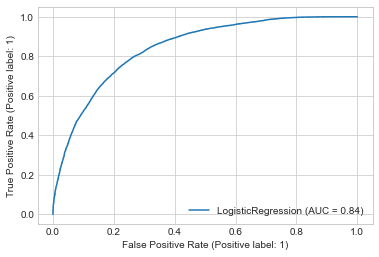

In [272]:
disp= plot_roc_curve(lr, X_train, y_train)

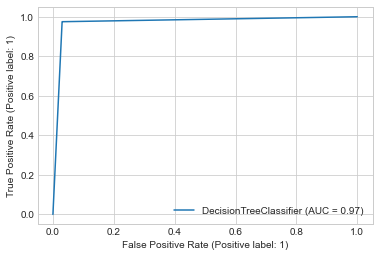

In [273]:
disp= plot_roc_curve(dt, X_train, y_train)

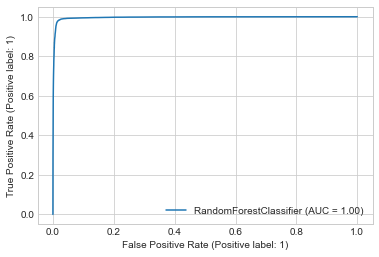

In [274]:
disp= plot_roc_curve(rf, X_train, y_train)

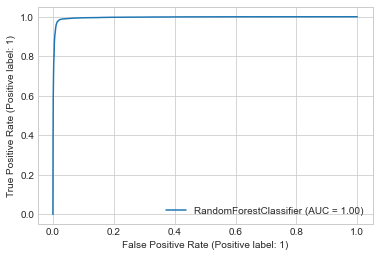

In [275]:
disp= plot_roc_curve(svc, X_train, y_train)

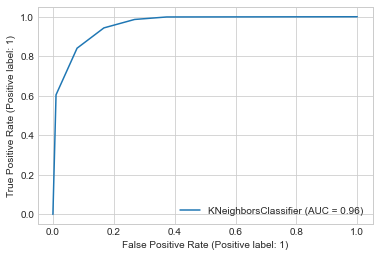

In [276]:
disp= plot_roc_curve(knc, X_train, y_train)

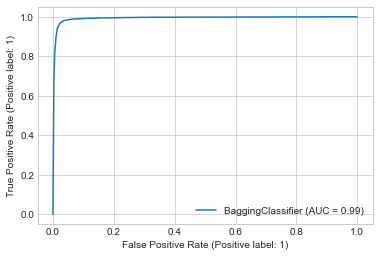

In [277]:
disp= plot_roc_curve(bag, X_train, y_train)

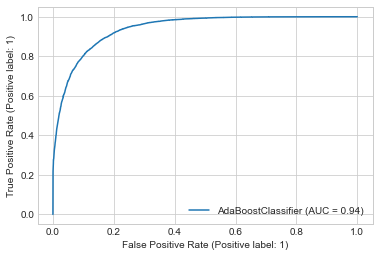

In [278]:
disp= plot_roc_curve(ada, X_train, y_train)

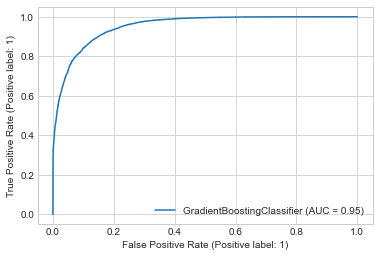

In [279]:
disp= plot_roc_curve(gb, X_train, y_train)

In [280]:
# considering all the above models, we can conclude Random forest Classifier is the best model for our problem.
# Let us proceed with this model...

In [281]:
# Random Forest

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 78)

# Training the model
rf.fit(X_train, y_train)
    
# Predicting Y_test
pred = rf.predict(X_test)
    
# Accuracy Score
acc_score = (accuracy_score(y_test, pred))*100
print("Accuracy Score:", acc_score)
    
# Classification Report
class_report = classification_report(y_test, pred)
print("\nClassification Report:\n", class_report)
    
# Cross Validation Score
cv_score = (cross_val_score(rf, X, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", abs(result))

Accuracy Score: 90.14813073124853

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      4203
           1       0.89      0.91      0.90      4303

    accuracy                           0.90      8506
   macro avg       0.90      0.90      0.90      8506
weighted avg       0.90      0.90      0.90      8506

Cross Validation Score: 89.70767973307359

Accuracy Score - Cross Validation Score is 0.4404509981749385


In [282]:
# check train and test score for Random Forest
y_pred= rf.predict(X_train)
pred= rf.predict(X_test)
train_result= accuracy_score(y_train, y_pred)*100
test_result= accuracy_score(y_test, pred)*100

In [283]:
train_result

99.99706055261612

In [284]:
test_result

90.14813073124853

In [285]:
#Hyperparameter tuning for RandomForestClassifier

In [286]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params={'n_estimators':[58],'min_samples_leaf': [5,10,15],'criterion':['entropy']}

rf2= RandomForestClassifier()

rfgrid=GridSearchCV(rf2,param_grid=params,cv=4)
rfgrid.fit(X_train,y_train)  
      
print(rfgrid.best_params_)

{'criterion': 'entropy', 'min_samples_leaf': 5, 'n_estimators': 58}


In [288]:
rf2= RandomForestClassifier(criterion= 'entropy', min_samples_leaf= 5, n_estimators= 58)
rf2.fit(X_train, y_train)
rf2.score(X_train, y_train)
pred_decision= rf2.predict(X_test)

# Accuracy Score
acc_score = (accuracy_score(y_test, pred_decision))*100
print("Accuracy Score:", acc_score)
    
# Classification Report
class_report = classification_report(y_test, pred_decision)
print("\nClassification Report:\n", class_report)
    
# Cross Validation Score
cv_score = (cross_val_score(rf2, X, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", abs(result))

Accuracy Score: 88.47872090289208

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88      4203
           1       0.86      0.92      0.89      4303

    accuracy                           0.88      8506
   macro avg       0.89      0.88      0.88      8506
weighted avg       0.89      0.88      0.88      8506

Cross Validation Score: 88.08040304364468

Accuracy Score - Cross Validation Score is 0.39831785924739904


In [289]:
# Conclusion

In [290]:
import pickle
filename= 'churn.pkl'
pickle.dump(rf2, open(filename, 'wb'))

In [291]:
[]

[]

In [292]:
loaded_model=pickle.load(open('churn.pkl','rb'))
result= loaded_model.score(X_test, y_test)
print(result*100)

88.47872090289208


In [293]:
conclusion= pd.DataFrame([loaded_model.predict(X_test)[:],pred_decision[:]], index=['Predicted','Original'])

In [294]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,8496,8497,8498,8499,8500,8501,8502,8503,8504,8505
Predicted,1,0,1,0,1,1,0,0,1,1,...,1,1,0,0,0,0,0,1,1,0
Original,1,0,1,0,1,1,0,0,1,1,...,1,1,0,0,0,0,0,1,1,0
